In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("data/digit-recognizor.csv")
print(data.shape)
data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 方差过滤

In [3]:
X = data.copy()

selector = VarianceThreshold() # 默认方差为 0
X_var0 = selector.fit_transform(X)

In [4]:
X_var0.shape

(42000, 709)

In [5]:
X_var1 = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [6]:
X.var().values[:10]

array([8.33898537, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [7]:
np.median(X.var().values)

1325.1294768872046

In [8]:
X_var1.shape

(42000, 392)

## CatBoost 和 RF 在不同方差过滤效果的对比

In [9]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [10]:
x_var = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

In [11]:
# 很慢
score1 = cross_val_score(CatBoostClassifier(), x, y, cv=5).mean()
score2 = cross_val_score(CatBoostClassifier(), x_var, y, cv=5).mean()
print(score1)
print(score2)

Learning rate set to 0.09466
0:	learn: 2.0156041	total: 7.15s	remaining: 1h 59m 6s
1:	learn: 1.8199402	total: 8.27s	remaining: 1h 8m 47s
2:	learn: 1.6611400	total: 9.24s	remaining: 51m 12s
3:	learn: 1.5413764	total: 10.2s	remaining: 42m 9s
4:	learn: 1.4418419	total: 11.1s	remaining: 36m 48s
5:	learn: 1.3522417	total: 12.2s	remaining: 33m 41s
6:	learn: 1.2811417	total: 13.2s	remaining: 31m 15s
7:	learn: 1.2186511	total: 14.1s	remaining: 29m 14s
8:	learn: 1.1522486	total: 15.2s	remaining: 27m 57s
9:	learn: 1.0958945	total: 16.1s	remaining: 26m 37s
10:	learn: 1.0363670	total: 17s	remaining: 25m 32s
11:	learn: 0.9856253	total: 17.9s	remaining: 24m 37s
12:	learn: 0.9397251	total: 18.9s	remaining: 23m 51s
13:	learn: 0.9024513	total: 19.8s	remaining: 23m 12s
14:	learn: 0.8646269	total: 20.7s	remaining: 22m 37s
15:	learn: 0.8339459	total: 21.6s	remaining: 22m 7s
16:	learn: 0.7965816	total: 22.5s	remaining: 21m 40s
17:	learn: 0.7705260	total: 23.5s	remaining: 21m 23s
18:	learn: 0.7458402	total:

153:	learn: 0.1655990	total: 2m 48s	remaining: 15m 28s
154:	learn: 0.1650607	total: 2m 49s	remaining: 15m 26s
155:	learn: 0.1645366	total: 2m 50s	remaining: 15m 25s
156:	learn: 0.1636046	total: 2m 52s	remaining: 15m 23s
157:	learn: 0.1634892	total: 2m 53s	remaining: 15m 22s
158:	learn: 0.1628659	total: 2m 54s	remaining: 15m 20s
159:	learn: 0.1627906	total: 2m 55s	remaining: 15m 19s
160:	learn: 0.1620444	total: 2m 56s	remaining: 15m 18s
161:	learn: 0.1602864	total: 2m 57s	remaining: 15m 17s
162:	learn: 0.1601867	total: 2m 58s	remaining: 15m 15s
163:	learn: 0.1598396	total: 2m 59s	remaining: 15m 13s
164:	learn: 0.1595898	total: 3m	remaining: 15m 12s
165:	learn: 0.1589531	total: 3m 1s	remaining: 15m 10s
166:	learn: 0.1586150	total: 3m 2s	remaining: 15m 8s
167:	learn: 0.1583189	total: 3m 3s	remaining: 15m 7s
168:	learn: 0.1579465	total: 3m 4s	remaining: 15m 5s
169:	learn: 0.1577692	total: 3m 5s	remaining: 15m 4s
170:	learn: 0.1575178	total: 3m 6s	remaining: 15m 3s
171:	learn: 0.1572741	tot

304:	learn: 0.1256025	total: 5m 29s	remaining: 12m 31s
305:	learn: 0.1254207	total: 5m 30s	remaining: 12m 29s
306:	learn: 0.1253525	total: 5m 31s	remaining: 12m 28s
307:	learn: 0.1251264	total: 5m 32s	remaining: 12m 26s
308:	learn: 0.1250702	total: 5m 33s	remaining: 12m 25s
309:	learn: 0.1245330	total: 5m 34s	remaining: 12m 23s
310:	learn: 0.1243640	total: 5m 35s	remaining: 12m 22s
311:	learn: 0.1243087	total: 5m 36s	remaining: 12m 21s
312:	learn: 0.1241937	total: 5m 36s	remaining: 12m 19s
313:	learn: 0.1240758	total: 5m 37s	remaining: 12m 18s
314:	learn: 0.1239604	total: 5m 38s	remaining: 12m 16s
315:	learn: 0.1239284	total: 5m 39s	remaining: 12m 15s
316:	learn: 0.1238937	total: 5m 40s	remaining: 12m 13s
317:	learn: 0.1238387	total: 5m 41s	remaining: 12m 12s
318:	learn: 0.1237012	total: 5m 42s	remaining: 12m 10s
319:	learn: 0.1236259	total: 5m 43s	remaining: 12m 9s
320:	learn: 0.1233985	total: 5m 44s	remaining: 12m 7s
321:	learn: 0.1232909	total: 5m 45s	remaining: 12m 6s
322:	learn: 0

455:	learn: 0.1050090	total: 7m 57s	remaining: 9m 29s
456:	learn: 0.1049570	total: 7m 58s	remaining: 9m 28s
457:	learn: 0.1046606	total: 7m 59s	remaining: 9m 27s
458:	learn: 0.1046002	total: 8m	remaining: 9m 26s
459:	learn: 0.1044658	total: 8m 1s	remaining: 9m 24s
460:	learn: 0.1043537	total: 8m 2s	remaining: 9m 23s
461:	learn: 0.1043089	total: 8m 3s	remaining: 9m 22s
462:	learn: 0.1042655	total: 8m 4s	remaining: 9m 21s
463:	learn: 0.1040580	total: 8m 5s	remaining: 9m 20s
464:	learn: 0.1039538	total: 8m 6s	remaining: 9m 19s
465:	learn: 0.1038301	total: 8m 7s	remaining: 9m 18s
466:	learn: 0.1037132	total: 8m 8s	remaining: 9m 17s
467:	learn: 0.1036959	total: 8m 9s	remaining: 9m 16s
468:	learn: 0.1035951	total: 8m 10s	remaining: 9m 14s
469:	learn: 0.1035257	total: 8m 11s	remaining: 9m 13s
470:	learn: 0.1034457	total: 8m 12s	remaining: 9m 12s
471:	learn: 0.1032926	total: 8m 13s	remaining: 9m 11s
472:	learn: 0.1032512	total: 8m 14s	remaining: 9m 10s
473:	learn: 0.1031873	total: 8m 15s	remai

608:	learn: 0.0917959	total: 10m 25s	remaining: 6m 41s
609:	learn: 0.0917810	total: 10m 26s	remaining: 6m 40s
610:	learn: 0.0917139	total: 10m 27s	remaining: 6m 39s
611:	learn: 0.0916708	total: 10m 28s	remaining: 6m 38s
612:	learn: 0.0916482	total: 10m 29s	remaining: 6m 37s
613:	learn: 0.0916451	total: 10m 30s	remaining: 6m 36s
614:	learn: 0.0915584	total: 10m 31s	remaining: 6m 35s
615:	learn: 0.0915429	total: 10m 32s	remaining: 6m 34s
616:	learn: 0.0914864	total: 10m 33s	remaining: 6m 33s
617:	learn: 0.0912877	total: 10m 34s	remaining: 6m 32s
618:	learn: 0.0911907	total: 10m 35s	remaining: 6m 31s
619:	learn: 0.0911184	total: 10m 36s	remaining: 6m 30s
620:	learn: 0.0910575	total: 10m 37s	remaining: 6m 29s
621:	learn: 0.0910062	total: 10m 38s	remaining: 6m 28s
622:	learn: 0.0909176	total: 10m 39s	remaining: 6m 27s
623:	learn: 0.0907427	total: 10m 40s	remaining: 6m 25s
624:	learn: 0.0906568	total: 10m 41s	remaining: 6m 24s
625:	learn: 0.0905888	total: 10m 42s	remaining: 6m 23s
626:	learn

758:	learn: 0.0806438	total: 12m 46s	remaining: 4m 3s
759:	learn: 0.0805639	total: 12m 47s	remaining: 4m 2s
760:	learn: 0.0805191	total: 12m 48s	remaining: 4m 1s
761:	learn: 0.0804419	total: 12m 49s	remaining: 4m
762:	learn: 0.0803217	total: 12m 50s	remaining: 3m 59s
763:	learn: 0.0802824	total: 12m 51s	remaining: 3m 58s
764:	learn: 0.0802511	total: 12m 52s	remaining: 3m 57s
765:	learn: 0.0802111	total: 12m 53s	remaining: 3m 56s
766:	learn: 0.0799860	total: 12m 55s	remaining: 3m 55s
767:	learn: 0.0799664	total: 12m 56s	remaining: 3m 54s
768:	learn: 0.0798976	total: 12m 57s	remaining: 3m 53s
769:	learn: 0.0798542	total: 12m 58s	remaining: 3m 52s
770:	learn: 0.0798129	total: 12m 59s	remaining: 3m 51s
771:	learn: 0.0798071	total: 13m	remaining: 3m 50s
772:	learn: 0.0797822	total: 13m 1s	remaining: 3m 49s
773:	learn: 0.0797658	total: 13m 2s	remaining: 3m 48s
774:	learn: 0.0797189	total: 13m 3s	remaining: 3m 47s
775:	learn: 0.0795881	total: 13m 4s	remaining: 3m 46s
776:	learn: 0.0795735	tot

909:	learn: 0.0726194	total: 15m 19s	remaining: 1m 30s
910:	learn: 0.0725502	total: 15m 20s	remaining: 1m 29s
911:	learn: 0.0724975	total: 15m 21s	remaining: 1m 28s
912:	learn: 0.0724459	total: 15m 22s	remaining: 1m 27s
913:	learn: 0.0723462	total: 15m 23s	remaining: 1m 26s
914:	learn: 0.0722347	total: 15m 24s	remaining: 1m 25s
915:	learn: 0.0721850	total: 15m 25s	remaining: 1m 24s
916:	learn: 0.0721248	total: 15m 26s	remaining: 1m 23s
917:	learn: 0.0720720	total: 15m 27s	remaining: 1m 22s
918:	learn: 0.0720218	total: 15m 28s	remaining: 1m 21s
919:	learn: 0.0719713	total: 15m 29s	remaining: 1m 20s
920:	learn: 0.0718768	total: 15m 30s	remaining: 1m 19s
921:	learn: 0.0717836	total: 15m 30s	remaining: 1m 18s
922:	learn: 0.0717306	total: 15m 31s	remaining: 1m 17s
923:	learn: 0.0716462	total: 15m 32s	remaining: 1m 16s
924:	learn: 0.0715740	total: 15m 33s	remaining: 1m 15s
925:	learn: 0.0714820	total: 15m 34s	remaining: 1m 14s
926:	learn: 0.0714098	total: 15m 35s	remaining: 1m 13s
927:	learn

63:	learn: 0.2962607	total: 1m 8s	remaining: 16m 36s
64:	learn: 0.2918291	total: 1m 9s	remaining: 16m 34s
65:	learn: 0.2884915	total: 1m 10s	remaining: 16m 32s
66:	learn: 0.2844450	total: 1m 11s	remaining: 16m 30s
67:	learn: 0.2814124	total: 1m 12s	remaining: 16m 29s
68:	learn: 0.2782370	total: 1m 13s	remaining: 16m 27s
69:	learn: 0.2740961	total: 1m 14s	remaining: 16m 27s
70:	learn: 0.2711193	total: 1m 15s	remaining: 16m 27s
71:	learn: 0.2679800	total: 1m 16s	remaining: 16m 24s
72:	learn: 0.2637884	total: 1m 17s	remaining: 16m 21s
73:	learn: 0.2614705	total: 1m 18s	remaining: 16m 20s
74:	learn: 0.2590818	total: 1m 19s	remaining: 16m 18s
75:	learn: 0.2568589	total: 1m 20s	remaining: 16m 16s
76:	learn: 0.2548069	total: 1m 21s	remaining: 16m 14s
77:	learn: 0.2514271	total: 1m 22s	remaining: 16m 13s
78:	learn: 0.2488884	total: 1m 23s	remaining: 16m 11s
79:	learn: 0.2468296	total: 1m 24s	remaining: 16m 10s
80:	learn: 0.2446677	total: 1m 25s	remaining: 16m 9s
81:	learn: 0.2430375	total: 1m 

214:	learn: 0.1443620	total: 3m 38s	remaining: 13m 18s
215:	learn: 0.1441594	total: 3m 39s	remaining: 13m 17s
216:	learn: 0.1440503	total: 3m 40s	remaining: 13m 15s
217:	learn: 0.1437872	total: 3m 41s	remaining: 13m 14s
218:	learn: 0.1433488	total: 3m 42s	remaining: 13m 13s
219:	learn: 0.1430513	total: 3m 43s	remaining: 13m 11s
220:	learn: 0.1429721	total: 3m 44s	remaining: 13m 10s
221:	learn: 0.1421641	total: 3m 45s	remaining: 13m 9s
222:	learn: 0.1419277	total: 3m 46s	remaining: 13m 8s
223:	learn: 0.1415575	total: 3m 47s	remaining: 13m 7s
224:	learn: 0.1415023	total: 3m 48s	remaining: 13m 6s
225:	learn: 0.1413342	total: 3m 49s	remaining: 13m 5s
226:	learn: 0.1411873	total: 3m 50s	remaining: 13m 3s
227:	learn: 0.1410315	total: 3m 51s	remaining: 13m 2s
228:	learn: 0.1407225	total: 3m 52s	remaining: 13m 1s
229:	learn: 0.1405649	total: 3m 53s	remaining: 13m
230:	learn: 0.1401755	total: 3m 54s	remaining: 12m 59s
231:	learn: 0.1400382	total: 3m 55s	remaining: 12m 58s
232:	learn: 0.1398017	

365:	learn: 0.1161076	total: 6m 5s	remaining: 10m 33s
366:	learn: 0.1159329	total: 6m 6s	remaining: 10m 32s
367:	learn: 0.1157816	total: 6m 7s	remaining: 10m 30s
368:	learn: 0.1155593	total: 6m 8s	remaining: 10m 29s
369:	learn: 0.1155085	total: 6m 9s	remaining: 10m 28s
370:	learn: 0.1153500	total: 6m 10s	remaining: 10m 27s
371:	learn: 0.1150798	total: 6m 11s	remaining: 10m 26s
372:	learn: 0.1150441	total: 6m 12s	remaining: 10m 25s
373:	learn: 0.1148522	total: 6m 12s	remaining: 10m 24s
374:	learn: 0.1148184	total: 6m 13s	remaining: 10m 23s
375:	learn: 0.1146699	total: 6m 14s	remaining: 10m 22s
376:	learn: 0.1145270	total: 6m 15s	remaining: 10m 21s
377:	learn: 0.1143873	total: 6m 16s	remaining: 10m 20s
378:	learn: 0.1143132	total: 6m 17s	remaining: 10m 19s
379:	learn: 0.1142189	total: 6m 18s	remaining: 10m 17s
380:	learn: 0.1141982	total: 6m 19s	remaining: 10m 16s
381:	learn: 0.1138309	total: 6m 20s	remaining: 10m 15s
382:	learn: 0.1137446	total: 6m 21s	remaining: 10m 14s
383:	learn: 0.1

518:	learn: 0.1003257	total: 8m 29s	remaining: 7m 51s
519:	learn: 0.1003000	total: 8m 30s	remaining: 7m 50s
520:	learn: 0.1001709	total: 8m 30s	remaining: 7m 49s
521:	learn: 0.0999423	total: 8m 31s	remaining: 7m 48s
522:	learn: 0.0998242	total: 8m 32s	remaining: 7m 47s
523:	learn: 0.0997534	total: 8m 33s	remaining: 7m 46s
524:	learn: 0.0997133	total: 8m 34s	remaining: 7m 45s
525:	learn: 0.0996513	total: 8m 35s	remaining: 7m 44s
526:	learn: 0.0996004	total: 8m 36s	remaining: 7m 43s
527:	learn: 0.0993895	total: 8m 37s	remaining: 7m 42s
528:	learn: 0.0992921	total: 8m 38s	remaining: 7m 41s
529:	learn: 0.0992565	total: 8m 39s	remaining: 7m 40s
530:	learn: 0.0990900	total: 8m 40s	remaining: 7m 39s
531:	learn: 0.0989250	total: 8m 40s	remaining: 7m 38s
532:	learn: 0.0988621	total: 8m 41s	remaining: 7m 37s
533:	learn: 0.0987641	total: 8m 42s	remaining: 7m 36s
534:	learn: 0.0987235	total: 8m 43s	remaining: 7m 35s
535:	learn: 0.0986451	total: 8m 44s	remaining: 7m 34s
536:	learn: 0.0985281	total:

670:	learn: 0.0875979	total: 10m 53s	remaining: 5m 20s
671:	learn: 0.0875714	total: 10m 54s	remaining: 5m 19s
672:	learn: 0.0874545	total: 10m 55s	remaining: 5m 18s
673:	learn: 0.0873961	total: 10m 56s	remaining: 5m 17s
674:	learn: 0.0873414	total: 10m 57s	remaining: 5m 16s
675:	learn: 0.0872717	total: 10m 58s	remaining: 5m 15s
676:	learn: 0.0871995	total: 10m 59s	remaining: 5m 14s
677:	learn: 0.0870646	total: 11m	remaining: 5m 13s
678:	learn: 0.0869993	total: 11m 1s	remaining: 5m 12s
679:	learn: 0.0869817	total: 11m 2s	remaining: 5m 11s
680:	learn: 0.0869408	total: 11m 3s	remaining: 5m 10s
681:	learn: 0.0868695	total: 11m 3s	remaining: 5m 9s
682:	learn: 0.0867124	total: 11m 4s	remaining: 5m 8s
683:	learn: 0.0866709	total: 11m 5s	remaining: 5m 7s
684:	learn: 0.0865649	total: 11m 6s	remaining: 5m 6s
685:	learn: 0.0865260	total: 11m 7s	remaining: 5m 5s
686:	learn: 0.0864769	total: 11m 8s	remaining: 5m 4s
687:	learn: 0.0864330	total: 11m 9s	remaining: 5m 3s
688:	learn: 0.0864188	total: 11

821:	learn: 0.0769029	total: 13m 16s	remaining: 2m 52s
822:	learn: 0.0768856	total: 13m 16s	remaining: 2m 51s
823:	learn: 0.0768376	total: 13m 17s	remaining: 2m 50s
824:	learn: 0.0767608	total: 13m 18s	remaining: 2m 49s
825:	learn: 0.0767352	total: 13m 19s	remaining: 2m 48s
826:	learn: 0.0766714	total: 13m 20s	remaining: 2m 47s
827:	learn: 0.0766154	total: 13m 21s	remaining: 2m 46s
828:	learn: 0.0765391	total: 13m 22s	remaining: 2m 45s
829:	learn: 0.0763856	total: 13m 23s	remaining: 2m 44s
830:	learn: 0.0762615	total: 13m 24s	remaining: 2m 43s
831:	learn: 0.0761296	total: 13m 25s	remaining: 2m 42s
832:	learn: 0.0760662	total: 13m 26s	remaining: 2m 41s
833:	learn: 0.0759862	total: 13m 27s	remaining: 2m 40s
834:	learn: 0.0758698	total: 13m 28s	remaining: 2m 39s
835:	learn: 0.0758167	total: 13m 29s	remaining: 2m 38s
836:	learn: 0.0757830	total: 13m 30s	remaining: 2m 37s
837:	learn: 0.0757469	total: 13m 31s	remaining: 2m 36s
838:	learn: 0.0756970	total: 13m 32s	remaining: 2m 35s
839:	learn

972:	learn: 0.0679668	total: 15m 44s	remaining: 26.2s
973:	learn: 0.0679298	total: 15m 45s	remaining: 25.2s
974:	learn: 0.0678994	total: 15m 46s	remaining: 24.3s
975:	learn: 0.0678593	total: 15m 47s	remaining: 23.3s
976:	learn: 0.0678302	total: 15m 48s	remaining: 22.3s
977:	learn: 0.0677199	total: 15m 49s	remaining: 21.4s
978:	learn: 0.0676626	total: 15m 50s	remaining: 20.4s
979:	learn: 0.0675840	total: 15m 51s	remaining: 19.4s
980:	learn: 0.0675606	total: 15m 51s	remaining: 18.4s
981:	learn: 0.0674856	total: 15m 52s	remaining: 17.5s
982:	learn: 0.0674382	total: 15m 53s	remaining: 16.5s
983:	learn: 0.0674283	total: 15m 54s	remaining: 15.5s
984:	learn: 0.0673716	total: 15m 55s	remaining: 14.6s
985:	learn: 0.0672970	total: 15m 56s	remaining: 13.6s
986:	learn: 0.0672604	total: 15m 57s	remaining: 12.6s
987:	learn: 0.0671954	total: 15m 58s	remaining: 11.6s
988:	learn: 0.0671804	total: 16m	remaining: 10.7s
989:	learn: 0.0671259	total: 16m 1s	remaining: 9.71s
990:	learn: 0.0670569	total: 16m 

126:	learn: 0.1761104	total: 2m 8s	remaining: 14m 44s
127:	learn: 0.1757315	total: 2m 9s	remaining: 14m 43s
128:	learn: 0.1746955	total: 2m 10s	remaining: 14m 41s
129:	learn: 0.1744244	total: 2m 11s	remaining: 14m 40s
130:	learn: 0.1743235	total: 2m 12s	remaining: 14m 39s
131:	learn: 0.1737023	total: 2m 13s	remaining: 14m 38s
132:	learn: 0.1727167	total: 2m 14s	remaining: 14m 37s
133:	learn: 0.1724853	total: 2m 15s	remaining: 14m 36s
134:	learn: 0.1721951	total: 2m 16s	remaining: 14m 35s
135:	learn: 0.1717778	total: 2m 17s	remaining: 14m 34s
136:	learn: 0.1709247	total: 2m 18s	remaining: 14m 32s
137:	learn: 0.1706228	total: 2m 19s	remaining: 14m 31s
138:	learn: 0.1693335	total: 2m 20s	remaining: 14m 29s
139:	learn: 0.1685507	total: 2m 21s	remaining: 14m 27s
140:	learn: 0.1670418	total: 2m 22s	remaining: 14m 26s
141:	learn: 0.1665644	total: 2m 23s	remaining: 14m 26s
142:	learn: 0.1661739	total: 2m 24s	remaining: 14m 24s
143:	learn: 0.1659415	total: 2m 25s	remaining: 14m 23s
144:	learn: 

277:	learn: 0.1271128	total: 4m 35s	remaining: 11m 55s
278:	learn: 0.1270112	total: 4m 36s	remaining: 11m 54s
279:	learn: 0.1269715	total: 4m 37s	remaining: 11m 52s
280:	learn: 0.1267618	total: 4m 38s	remaining: 11m 51s
281:	learn: 0.1267005	total: 4m 39s	remaining: 11m 50s
282:	learn: 0.1264800	total: 4m 40s	remaining: 11m 49s
283:	learn: 0.1263989	total: 4m 40s	remaining: 11m 48s
284:	learn: 0.1262664	total: 4m 41s	remaining: 11m 47s
285:	learn: 0.1261111	total: 4m 42s	remaining: 11m 46s
286:	learn: 0.1260194	total: 4m 43s	remaining: 11m 45s
287:	learn: 0.1258409	total: 4m 44s	remaining: 11m 43s
288:	learn: 0.1257576	total: 4m 45s	remaining: 11m 42s
289:	learn: 0.1257040	total: 4m 46s	remaining: 11m 41s
290:	learn: 0.1254814	total: 4m 47s	remaining: 11m 40s
291:	learn: 0.1253831	total: 4m 48s	remaining: 11m 39s
292:	learn: 0.1252734	total: 4m 49s	remaining: 11m 38s
293:	learn: 0.1251853	total: 4m 50s	remaining: 11m 37s
294:	learn: 0.1248955	total: 4m 51s	remaining: 11m 36s
295:	learn

428:	learn: 0.1067534	total: 7m	remaining: 9m 19s
429:	learn: 0.1067290	total: 7m 1s	remaining: 9m 18s
430:	learn: 0.1063514	total: 7m 2s	remaining: 9m 17s
431:	learn: 0.1062466	total: 7m 3s	remaining: 9m 16s
432:	learn: 0.1059840	total: 7m 3s	remaining: 9m 15s
433:	learn: 0.1058697	total: 7m 4s	remaining: 9m 14s
434:	learn: 0.1057933	total: 7m 5s	remaining: 9m 13s
435:	learn: 0.1056868	total: 7m 6s	remaining: 9m 12s
436:	learn: 0.1055567	total: 7m 7s	remaining: 9m 11s
437:	learn: 0.1054770	total: 7m 8s	remaining: 9m 10s
438:	learn: 0.1052739	total: 7m 9s	remaining: 9m 9s
439:	learn: 0.1052365	total: 7m 10s	remaining: 9m 8s
440:	learn: 0.1050864	total: 7m 11s	remaining: 9m 7s
441:	learn: 0.1048683	total: 7m 12s	remaining: 9m 6s
442:	learn: 0.1047570	total: 7m 13s	remaining: 9m 5s
443:	learn: 0.1046854	total: 7m 14s	remaining: 9m 4s
444:	learn: 0.1046340	total: 7m 15s	remaining: 9m 3s
445:	learn: 0.1043409	total: 7m 16s	remaining: 9m 2s
446:	learn: 0.1042695	total: 7m 18s	remaining: 9m 

582:	learn: 0.0927986	total: 9m 28s	remaining: 6m 46s
583:	learn: 0.0927586	total: 9m 29s	remaining: 6m 45s
584:	learn: 0.0926531	total: 9m 30s	remaining: 6m 45s
585:	learn: 0.0924967	total: 9m 31s	remaining: 6m 44s
586:	learn: 0.0924331	total: 9m 32s	remaining: 6m 42s
587:	learn: 0.0923391	total: 9m 33s	remaining: 6m 41s
588:	learn: 0.0923090	total: 9m 34s	remaining: 6m 40s
589:	learn: 0.0922468	total: 9m 35s	remaining: 6m 40s
590:	learn: 0.0921460	total: 9m 36s	remaining: 6m 39s
591:	learn: 0.0920975	total: 9m 37s	remaining: 6m 38s
592:	learn: 0.0919287	total: 9m 38s	remaining: 6m 37s
593:	learn: 0.0918967	total: 9m 39s	remaining: 6m 36s
594:	learn: 0.0918784	total: 9m 40s	remaining: 6m 35s
595:	learn: 0.0917982	total: 9m 41s	remaining: 6m 34s
596:	learn: 0.0917664	total: 9m 42s	remaining: 6m 33s
597:	learn: 0.0915977	total: 9m 43s	remaining: 6m 32s
598:	learn: 0.0915576	total: 9m 44s	remaining: 6m 31s
599:	learn: 0.0914721	total: 9m 45s	remaining: 6m 30s
600:	learn: 0.0914513	total:

733:	learn: 0.0807984	total: 11m 54s	remaining: 4m 19s
734:	learn: 0.0807526	total: 11m 55s	remaining: 4m 18s
735:	learn: 0.0807224	total: 11m 56s	remaining: 4m 17s
736:	learn: 0.0806798	total: 11m 57s	remaining: 4m 16s
737:	learn: 0.0806423	total: 11m 58s	remaining: 4m 15s
738:	learn: 0.0806024	total: 11m 59s	remaining: 4m 14s
739:	learn: 0.0805626	total: 12m	remaining: 4m 13s
740:	learn: 0.0805369	total: 12m 1s	remaining: 4m 12s
741:	learn: 0.0802871	total: 12m 2s	remaining: 4m 11s
742:	learn: 0.0802409	total: 12m 3s	remaining: 4m 10s
743:	learn: 0.0800841	total: 12m 4s	remaining: 4m 9s
744:	learn: 0.0800435	total: 12m 5s	remaining: 4m 8s
745:	learn: 0.0799799	total: 12m 6s	remaining: 4m 7s
746:	learn: 0.0799647	total: 12m 7s	remaining: 4m 6s
747:	learn: 0.0798354	total: 12m 8s	remaining: 4m 5s
748:	learn: 0.0798044	total: 12m 9s	remaining: 4m 4s
749:	learn: 0.0797552	total: 12m 10s	remaining: 4m 3s
750:	learn: 0.0795725	total: 12m 11s	remaining: 4m 2s
751:	learn: 0.0794347	total: 12

884:	learn: 0.0713848	total: 14m 26s	remaining: 1m 52s
885:	learn: 0.0713141	total: 14m 27s	remaining: 1m 51s
886:	learn: 0.0712622	total: 14m 29s	remaining: 1m 50s
887:	learn: 0.0712005	total: 14m 30s	remaining: 1m 49s
888:	learn: 0.0711576	total: 14m 31s	remaining: 1m 48s
889:	learn: 0.0710853	total: 14m 32s	remaining: 1m 47s
890:	learn: 0.0710699	total: 14m 33s	remaining: 1m 46s
891:	learn: 0.0710274	total: 14m 34s	remaining: 1m 45s
892:	learn: 0.0710003	total: 14m 35s	remaining: 1m 44s
893:	learn: 0.0709454	total: 14m 36s	remaining: 1m 43s
894:	learn: 0.0708850	total: 14m 37s	remaining: 1m 42s
895:	learn: 0.0708833	total: 14m 38s	remaining: 1m 41s
896:	learn: 0.0708447	total: 14m 39s	remaining: 1m 40s
897:	learn: 0.0706877	total: 14m 40s	remaining: 1m 40s
898:	learn: 0.0706303	total: 14m 41s	remaining: 1m 39s
899:	learn: 0.0705887	total: 14m 42s	remaining: 1m 38s
900:	learn: 0.0705633	total: 14m 43s	remaining: 1m 37s
901:	learn: 0.0704505	total: 14m 44s	remaining: 1m 36s
902:	learn

37:	learn: 0.4435714	total: 36.9s	remaining: 15m 32s
38:	learn: 0.4357313	total: 37.9s	remaining: 15m 32s
39:	learn: 0.4284398	total: 38.9s	remaining: 15m 33s
40:	learn: 0.4196085	total: 39.8s	remaining: 15m 31s
41:	learn: 0.4124583	total: 40.8s	remaining: 15m 30s
42:	learn: 0.4052350	total: 41.7s	remaining: 15m 28s
43:	learn: 0.3989215	total: 42.8s	remaining: 15m 29s
44:	learn: 0.3900213	total: 43.8s	remaining: 15m 29s
45:	learn: 0.3829511	total: 44.8s	remaining: 15m 29s
46:	learn: 0.3763263	total: 45.9s	remaining: 15m 30s
47:	learn: 0.3716647	total: 46.8s	remaining: 15m 29s
48:	learn: 0.3665202	total: 47.8s	remaining: 15m 27s
49:	learn: 0.3611632	total: 48.7s	remaining: 15m 25s
50:	learn: 0.3565006	total: 49.6s	remaining: 15m 23s
51:	learn: 0.3509072	total: 50.5s	remaining: 15m 21s
52:	learn: 0.3457830	total: 51.5s	remaining: 15m 20s
53:	learn: 0.3427098	total: 52.4s	remaining: 15m 18s
54:	learn: 0.3377360	total: 53.3s	remaining: 15m 16s
55:	learn: 0.3329563	total: 54.2s	remaining: 1

189:	learn: 0.1489777	total: 3m 1s	remaining: 12m 55s
190:	learn: 0.1486920	total: 3m 2s	remaining: 12m 54s
191:	learn: 0.1484717	total: 3m 3s	remaining: 12m 53s
192:	learn: 0.1483294	total: 3m 4s	remaining: 12m 52s
193:	learn: 0.1480252	total: 3m 5s	remaining: 12m 52s
194:	learn: 0.1477508	total: 3m 7s	remaining: 12m 52s
195:	learn: 0.1473594	total: 3m 8s	remaining: 12m 52s
196:	learn: 0.1471128	total: 3m 9s	remaining: 12m 53s
197:	learn: 0.1469534	total: 3m 10s	remaining: 12m 53s
198:	learn: 0.1467888	total: 3m 12s	remaining: 12m 54s
199:	learn: 0.1462300	total: 3m 13s	remaining: 12m 55s
200:	learn: 0.1459016	total: 3m 15s	remaining: 12m 57s
201:	learn: 0.1456649	total: 3m 16s	remaining: 12m 58s
202:	learn: 0.1455730	total: 3m 18s	remaining: 12m 58s
203:	learn: 0.1454823	total: 3m 19s	remaining: 12m 58s
204:	learn: 0.1447212	total: 3m 20s	remaining: 12m 59s
205:	learn: 0.1446995	total: 3m 22s	remaining: 12m 58s
206:	learn: 0.1444882	total: 3m 23s	remaining: 12m 58s
207:	learn: 0.1443

339:	learn: 0.1223157	total: 5m 47s	remaining: 11m 15s
340:	learn: 0.1223003	total: 5m 48s	remaining: 11m 13s
341:	learn: 0.1220995	total: 5m 49s	remaining: 11m 12s
342:	learn: 0.1215987	total: 5m 50s	remaining: 11m 11s
343:	learn: 0.1214749	total: 5m 51s	remaining: 11m 10s
344:	learn: 0.1212853	total: 5m 52s	remaining: 11m 9s
345:	learn: 0.1212637	total: 5m 53s	remaining: 11m 8s
346:	learn: 0.1211398	total: 5m 54s	remaining: 11m 7s
347:	learn: 0.1210221	total: 5m 55s	remaining: 11m 6s
348:	learn: 0.1207740	total: 5m 57s	remaining: 11m 5s
349:	learn: 0.1207405	total: 5m 58s	remaining: 11m 5s
350:	learn: 0.1206482	total: 5m 59s	remaining: 11m 5s
351:	learn: 0.1202870	total: 6m 1s	remaining: 11m 4s
352:	learn: 0.1201559	total: 6m 2s	remaining: 11m 3s
353:	learn: 0.1198625	total: 6m 3s	remaining: 11m 3s
354:	learn: 0.1198089	total: 6m 4s	remaining: 11m 2s
355:	learn: 0.1196067	total: 6m 6s	remaining: 11m 2s
356:	learn: 0.1191869	total: 6m 7s	remaining: 11m 1s
357:	learn: 0.1188655	total: 

491:	learn: 0.1049752	total: 8m 18s	remaining: 8m 35s
492:	learn: 0.1049274	total: 8m 19s	remaining: 8m 33s
493:	learn: 0.1048959	total: 8m 20s	remaining: 8m 32s
494:	learn: 0.1048345	total: 8m 21s	remaining: 8m 31s
495:	learn: 0.1047398	total: 8m 22s	remaining: 8m 30s
496:	learn: 0.1047219	total: 8m 23s	remaining: 8m 29s
497:	learn: 0.1046786	total: 8m 24s	remaining: 8m 28s
498:	learn: 0.1046383	total: 8m 25s	remaining: 8m 27s
499:	learn: 0.1045780	total: 8m 26s	remaining: 8m 26s
500:	learn: 0.1044548	total: 8m 27s	remaining: 8m 25s
501:	learn: 0.1043384	total: 8m 28s	remaining: 8m 24s
502:	learn: 0.1043114	total: 8m 29s	remaining: 8m 22s
503:	learn: 0.1040940	total: 8m 30s	remaining: 8m 21s
504:	learn: 0.1039189	total: 8m 30s	remaining: 8m 20s
505:	learn: 0.1038078	total: 8m 31s	remaining: 8m 19s
506:	learn: 0.1037357	total: 8m 32s	remaining: 8m 18s
507:	learn: 0.1035739	total: 8m 33s	remaining: 8m 17s
508:	learn: 0.1034952	total: 8m 34s	remaining: 8m 16s
509:	learn: 0.1033861	total:

644:	learn: 0.0922309	total: 10m 49s	remaining: 5m 57s
645:	learn: 0.0922153	total: 10m 50s	remaining: 5m 56s
646:	learn: 0.0921964	total: 10m 51s	remaining: 5m 55s
647:	learn: 0.0921084	total: 10m 52s	remaining: 5m 54s
648:	learn: 0.0920003	total: 10m 53s	remaining: 5m 53s
649:	learn: 0.0918572	total: 10m 54s	remaining: 5m 52s
650:	learn: 0.0918199	total: 10m 55s	remaining: 5m 51s
651:	learn: 0.0917358	total: 10m 56s	remaining: 5m 50s
652:	learn: 0.0916678	total: 10m 56s	remaining: 5m 49s
653:	learn: 0.0916510	total: 10m 57s	remaining: 5m 48s
654:	learn: 0.0916023	total: 10m 58s	remaining: 5m 46s
655:	learn: 0.0914682	total: 10m 59s	remaining: 5m 45s
656:	learn: 0.0914468	total: 11m	remaining: 5m 44s
657:	learn: 0.0913936	total: 11m 1s	remaining: 5m 43s
658:	learn: 0.0912499	total: 11m 2s	remaining: 5m 42s
659:	learn: 0.0912391	total: 11m 3s	remaining: 5m 41s
660:	learn: 0.0911916	total: 11m 4s	remaining: 5m 40s
661:	learn: 0.0911071	total: 11m 5s	remaining: 5m 39s
662:	learn: 0.09104

795:	learn: 0.0813861	total: 13m 34s	remaining: 3m 28s
796:	learn: 0.0812938	total: 13m 36s	remaining: 3m 27s
797:	learn: 0.0811938	total: 13m 36s	remaining: 3m 26s
798:	learn: 0.0811500	total: 13m 37s	remaining: 3m 25s
799:	learn: 0.0811065	total: 13m 38s	remaining: 3m 24s
800:	learn: 0.0810461	total: 13m 39s	remaining: 3m 23s
801:	learn: 0.0810043	total: 13m 40s	remaining: 3m 22s
802:	learn: 0.0809261	total: 13m 41s	remaining: 3m 21s
803:	learn: 0.0808964	total: 13m 42s	remaining: 3m 20s
804:	learn: 0.0807308	total: 13m 43s	remaining: 3m 19s
805:	learn: 0.0806849	total: 13m 44s	remaining: 3m 18s
806:	learn: 0.0806039	total: 13m 45s	remaining: 3m 17s
807:	learn: 0.0805813	total: 13m 45s	remaining: 3m 16s
808:	learn: 0.0805002	total: 13m 46s	remaining: 3m 15s
809:	learn: 0.0804583	total: 13m 47s	remaining: 3m 14s
810:	learn: 0.0802712	total: 13m 48s	remaining: 3m 13s
811:	learn: 0.0802170	total: 13m 49s	remaining: 3m 12s
812:	learn: 0.0802015	total: 13m 50s	remaining: 3m 11s
813:	learn

946:	learn: 0.0719059	total: 15m 51s	remaining: 53.2s
947:	learn: 0.0718514	total: 15m 52s	remaining: 52.2s
948:	learn: 0.0718149	total: 15m 52s	remaining: 51.2s
949:	learn: 0.0717623	total: 15m 53s	remaining: 50.2s
950:	learn: 0.0717408	total: 15m 54s	remaining: 49.2s
951:	learn: 0.0717312	total: 15m 55s	remaining: 48.2s
952:	learn: 0.0716813	total: 15m 56s	remaining: 47.2s
953:	learn: 0.0716031	total: 15m 57s	remaining: 46.2s
954:	learn: 0.0714883	total: 15m 58s	remaining: 45.2s
955:	learn: 0.0713691	total: 15m 59s	remaining: 44.1s
956:	learn: 0.0712954	total: 16m	remaining: 43.1s
957:	learn: 0.0712327	total: 16m 1s	remaining: 42.1s
958:	learn: 0.0711954	total: 16m 1s	remaining: 41.1s
959:	learn: 0.0711689	total: 16m 2s	remaining: 40.1s
960:	learn: 0.0711089	total: 16m 3s	remaining: 39.1s
961:	learn: 0.0710351	total: 16m 4s	remaining: 38.1s
962:	learn: 0.0709658	total: 16m 5s	remaining: 37.1s
963:	learn: 0.0709329	total: 16m 6s	remaining: 36.1s
964:	learn: 0.0708263	total: 16m 7s	rem

101:	learn: 0.2077454	total: 1m 35s	remaining: 14m 2s
102:	learn: 0.2059499	total: 1m 37s	remaining: 14m 5s
103:	learn: 0.2045626	total: 1m 38s	remaining: 14m 7s
104:	learn: 0.2034645	total: 1m 39s	remaining: 14m 10s
105:	learn: 0.2010504	total: 1m 41s	remaining: 14m 12s
106:	learn: 0.1993809	total: 1m 42s	remaining: 14m 15s
107:	learn: 0.1987936	total: 1m 43s	remaining: 14m 17s
108:	learn: 0.1976249	total: 1m 45s	remaining: 14m 19s
109:	learn: 0.1951180	total: 1m 46s	remaining: 14m 20s
110:	learn: 0.1937700	total: 1m 47s	remaining: 14m 23s
111:	learn: 0.1930349	total: 1m 49s	remaining: 14m 25s
112:	learn: 0.1918462	total: 1m 50s	remaining: 14m 28s
113:	learn: 0.1904649	total: 1m 51s	remaining: 14m 30s
114:	learn: 0.1896692	total: 1m 53s	remaining: 14m 31s
115:	learn: 0.1892684	total: 1m 54s	remaining: 14m 33s
116:	learn: 0.1878742	total: 1m 56s	remaining: 14m 35s
117:	learn: 0.1871996	total: 1m 57s	remaining: 14m 37s
118:	learn: 0.1868347	total: 1m 58s	remaining: 14m 36s
119:	learn: 0

252:	learn: 0.1353954	total: 4m 22s	remaining: 12m 54s
253:	learn: 0.1353021	total: 4m 23s	remaining: 12m 52s
254:	learn: 0.1349479	total: 4m 24s	remaining: 12m 51s
255:	learn: 0.1349074	total: 4m 24s	remaining: 12m 50s
256:	learn: 0.1347024	total: 4m 25s	remaining: 12m 48s
257:	learn: 0.1344039	total: 4m 26s	remaining: 12m 47s
258:	learn: 0.1342180	total: 4m 27s	remaining: 12m 46s
259:	learn: 0.1340206	total: 4m 28s	remaining: 12m 45s
260:	learn: 0.1339554	total: 4m 29s	remaining: 12m 44s
261:	learn: 0.1338392	total: 4m 31s	remaining: 12m 44s
262:	learn: 0.1334762	total: 4m 32s	remaining: 12m 43s
263:	learn: 0.1334258	total: 4m 33s	remaining: 12m 42s
264:	learn: 0.1333406	total: 4m 35s	remaining: 12m 42s
265:	learn: 0.1332687	total: 4m 36s	remaining: 12m 42s
266:	learn: 0.1332657	total: 4m 37s	remaining: 12m 42s
267:	learn: 0.1331430	total: 4m 39s	remaining: 12m 42s
268:	learn: 0.1330379	total: 4m 40s	remaining: 12m 41s
269:	learn: 0.1328773	total: 4m 41s	remaining: 12m 41s
270:	learn

402:	learn: 0.1131067	total: 6m 55s	remaining: 10m 14s
403:	learn: 0.1129790	total: 6m 56s	remaining: 10m 13s
404:	learn: 0.1128049	total: 6m 56s	remaining: 10m 12s
405:	learn: 0.1125720	total: 6m 57s	remaining: 10m 11s
406:	learn: 0.1124490	total: 6m 58s	remaining: 10m 10s
407:	learn: 0.1123574	total: 6m 59s	remaining: 10m 9s
408:	learn: 0.1122572	total: 7m	remaining: 10m 8s
409:	learn: 0.1121577	total: 7m 1s	remaining: 10m 7s
410:	learn: 0.1121067	total: 7m 2s	remaining: 10m 6s
411:	learn: 0.1120462	total: 7m 3s	remaining: 10m 5s
412:	learn: 0.1119713	total: 7m 5s	remaining: 10m 4s
413:	learn: 0.1118949	total: 7m 6s	remaining: 10m 3s
414:	learn: 0.1118158	total: 7m 7s	remaining: 10m 2s
415:	learn: 0.1115927	total: 7m 8s	remaining: 10m 1s
416:	learn: 0.1112735	total: 7m 9s	remaining: 10m
417:	learn: 0.1112651	total: 7m 10s	remaining: 9m 59s
418:	learn: 0.1111637	total: 7m 11s	remaining: 9m 58s
419:	learn: 0.1110534	total: 7m 12s	remaining: 9m 57s
420:	learn: 0.1109545	total: 7m 14s	re

555:	learn: 0.0979640	total: 9m 47s	remaining: 7m 49s
556:	learn: 0.0978637	total: 9m 48s	remaining: 7m 48s
557:	learn: 0.0978059	total: 9m 49s	remaining: 7m 47s
558:	learn: 0.0978025	total: 9m 51s	remaining: 7m 46s
559:	learn: 0.0977839	total: 9m 52s	remaining: 7m 45s
560:	learn: 0.0977699	total: 9m 53s	remaining: 7m 44s
561:	learn: 0.0976924	total: 9m 54s	remaining: 7m 43s
562:	learn: 0.0974712	total: 9m 56s	remaining: 7m 42s
563:	learn: 0.0974116	total: 9m 57s	remaining: 7m 41s
564:	learn: 0.0973603	total: 9m 58s	remaining: 7m 41s
565:	learn: 0.0972898	total: 10m	remaining: 7m 40s
566:	learn: 0.0971475	total: 10m 1s	remaining: 7m 39s
567:	learn: 0.0971268	total: 10m 2s	remaining: 7m 38s
568:	learn: 0.0971140	total: 10m 4s	remaining: 7m 37s
569:	learn: 0.0969893	total: 10m 5s	remaining: 7m 36s
570:	learn: 0.0968437	total: 10m 6s	remaining: 7m 35s
571:	learn: 0.0967074	total: 10m 7s	remaining: 7m 34s
572:	learn: 0.0966631	total: 10m 9s	remaining: 7m 33s
573:	learn: 0.0964664	total: 10

706:	learn: 0.0861581	total: 12m 40s	remaining: 5m 15s
707:	learn: 0.0861566	total: 12m 42s	remaining: 5m 14s
708:	learn: 0.0861442	total: 12m 43s	remaining: 5m 13s
709:	learn: 0.0861366	total: 12m 44s	remaining: 5m 12s
710:	learn: 0.0860039	total: 12m 45s	remaining: 5m 11s
711:	learn: 0.0859969	total: 12m 47s	remaining: 5m 10s
712:	learn: 0.0858970	total: 12m 48s	remaining: 5m 9s
713:	learn: 0.0857189	total: 12m 49s	remaining: 5m 8s
714:	learn: 0.0856785	total: 12m 50s	remaining: 5m 7s
715:	learn: 0.0856359	total: 12m 51s	remaining: 5m 6s
716:	learn: 0.0856143	total: 12m 53s	remaining: 5m 5s
717:	learn: 0.0855649	total: 12m 54s	remaining: 5m 4s
718:	learn: 0.0855445	total: 12m 55s	remaining: 5m 3s
719:	learn: 0.0855295	total: 12m 56s	remaining: 5m 1s
720:	learn: 0.0854243	total: 12m 57s	remaining: 5m
721:	learn: 0.0851713	total: 12m 58s	remaining: 4m 59s
722:	learn: 0.0851267	total: 12m 59s	remaining: 4m 58s
723:	learn: 0.0850339	total: 13m	remaining: 4m 57s
724:	learn: 0.0848562	tota

857:	learn: 0.0772269	total: 15m 24s	remaining: 2m 32s
858:	learn: 0.0771761	total: 15m 25s	remaining: 2m 31s
859:	learn: 0.0771680	total: 15m 26s	remaining: 2m 30s
860:	learn: 0.0771274	total: 15m 27s	remaining: 2m 29s
861:	learn: 0.0770953	total: 15m 29s	remaining: 2m 28s
862:	learn: 0.0769791	total: 15m 30s	remaining: 2m 27s
863:	learn: 0.0768692	total: 15m 31s	remaining: 2m 26s
864:	learn: 0.0768146	total: 15m 32s	remaining: 2m 25s
865:	learn: 0.0767271	total: 15m 33s	remaining: 2m 24s
866:	learn: 0.0766274	total: 15m 34s	remaining: 2m 23s
867:	learn: 0.0765947	total: 15m 35s	remaining: 2m 22s
868:	learn: 0.0764756	total: 15m 36s	remaining: 2m 21s
869:	learn: 0.0763758	total: 15m 37s	remaining: 2m 20s
870:	learn: 0.0763115	total: 15m 38s	remaining: 2m 19s
871:	learn: 0.0762741	total: 15m 39s	remaining: 2m 17s
872:	learn: 0.0761380	total: 15m 40s	remaining: 2m 16s
873:	learn: 0.0761170	total: 15m 41s	remaining: 2m 15s
874:	learn: 0.0759269	total: 15m 42s	remaining: 2m 14s
875:	learn

8:	learn: 1.1302634	total: 7.43s	remaining: 13m 38s
9:	learn: 1.0750352	total: 8.26s	remaining: 13m 38s
10:	learn: 1.0237129	total: 9.08s	remaining: 13m 36s
11:	learn: 0.9807241	total: 9.9s	remaining: 13m 35s
12:	learn: 0.9428077	total: 10.7s	remaining: 13m 32s
13:	learn: 0.9077920	total: 11.5s	remaining: 13m 31s
14:	learn: 0.8657782	total: 12.3s	remaining: 13m 29s
15:	learn: 0.8295828	total: 13.1s	remaining: 13m 28s
16:	learn: 0.7971718	total: 13.9s	remaining: 13m 26s
17:	learn: 0.7695255	total: 14.8s	remaining: 13m 25s
18:	learn: 0.7394522	total: 15.6s	remaining: 13m 24s
19:	learn: 0.7135136	total: 16.4s	remaining: 13m 23s
20:	learn: 0.6885146	total: 17.2s	remaining: 13m 21s
21:	learn: 0.6658184	total: 18s	remaining: 13m 20s
22:	learn: 0.6459382	total: 18.8s	remaining: 13m 19s
23:	learn: 0.6260887	total: 19.7s	remaining: 13m 19s
24:	learn: 0.6058505	total: 20.5s	remaining: 13m 18s
25:	learn: 0.5872093	total: 21.3s	remaining: 13m 18s
26:	learn: 0.5718829	total: 22.1s	remaining: 13m 17

162:	learn: 0.1283675	total: 2m 26s	remaining: 12m 32s
163:	learn: 0.1275290	total: 2m 27s	remaining: 12m 30s
164:	learn: 0.1269074	total: 2m 28s	remaining: 12m 29s
165:	learn: 0.1266420	total: 2m 28s	remaining: 12m 28s
166:	learn: 0.1256406	total: 2m 29s	remaining: 12m 26s
167:	learn: 0.1253256	total: 2m 30s	remaining: 12m 24s
168:	learn: 0.1249530	total: 2m 31s	remaining: 12m 23s
169:	learn: 0.1246656	total: 2m 31s	remaining: 12m 21s
170:	learn: 0.1241189	total: 2m 32s	remaining: 12m 19s
171:	learn: 0.1235063	total: 2m 33s	remaining: 12m 18s
172:	learn: 0.1231179	total: 2m 34s	remaining: 12m 16s
173:	learn: 0.1224031	total: 2m 34s	remaining: 12m 15s
174:	learn: 0.1219056	total: 2m 35s	remaining: 12m 13s
175:	learn: 0.1212352	total: 2m 36s	remaining: 12m 12s
176:	learn: 0.1209274	total: 2m 37s	remaining: 12m 10s
177:	learn: 0.1206901	total: 2m 37s	remaining: 12m 8s
178:	learn: 0.1197874	total: 2m 38s	remaining: 12m 7s
179:	learn: 0.1195381	total: 2m 39s	remaining: 12m 5s
180:	learn: 0

313:	learn: 0.0820450	total: 4m 17s	remaining: 9m 23s
314:	learn: 0.0818662	total: 4m 18s	remaining: 9m 21s
315:	learn: 0.0816567	total: 4m 19s	remaining: 9m 20s
316:	learn: 0.0815652	total: 4m 19s	remaining: 9m 19s
317:	learn: 0.0813635	total: 4m 20s	remaining: 9m 18s
318:	learn: 0.0812445	total: 4m 21s	remaining: 9m 17s
319:	learn: 0.0810868	total: 4m 22s	remaining: 9m 16s
320:	learn: 0.0808888	total: 4m 22s	remaining: 9m 15s
321:	learn: 0.0808109	total: 4m 23s	remaining: 9m 14s
322:	learn: 0.0806147	total: 4m 24s	remaining: 9m 13s
323:	learn: 0.0802966	total: 4m 25s	remaining: 9m 12s
324:	learn: 0.0801878	total: 4m 25s	remaining: 9m 11s
325:	learn: 0.0801018	total: 4m 26s	remaining: 9m 10s
326:	learn: 0.0800384	total: 4m 27s	remaining: 9m 9s
327:	learn: 0.0799014	total: 4m 27s	remaining: 9m 8s
328:	learn: 0.0797827	total: 4m 28s	remaining: 9m 7s
329:	learn: 0.0795075	total: 4m 29s	remaining: 9m 6s
330:	learn: 0.0793443	total: 4m 30s	remaining: 9m 5s
331:	learn: 0.0792208	total: 4m 3

466:	learn: 0.0633827	total: 6m 12s	remaining: 7m 5s
467:	learn: 0.0633134	total: 6m 13s	remaining: 7m 4s
468:	learn: 0.0632197	total: 6m 13s	remaining: 7m 3s
469:	learn: 0.0631870	total: 6m 14s	remaining: 7m 2s
470:	learn: 0.0631253	total: 6m 15s	remaining: 7m 1s
471:	learn: 0.0629149	total: 6m 16s	remaining: 7m
472:	learn: 0.0628357	total: 6m 16s	remaining: 6m 59s
473:	learn: 0.0627246	total: 6m 17s	remaining: 6m 59s
474:	learn: 0.0626259	total: 6m 18s	remaining: 6m 58s
475:	learn: 0.0625811	total: 6m 19s	remaining: 6m 57s
476:	learn: 0.0625471	total: 6m 19s	remaining: 6m 56s
477:	learn: 0.0624976	total: 6m 20s	remaining: 6m 55s
478:	learn: 0.0624326	total: 6m 21s	remaining: 6m 54s
479:	learn: 0.0623120	total: 6m 21s	remaining: 6m 53s
480:	learn: 0.0622387	total: 6m 22s	remaining: 6m 52s
481:	learn: 0.0620844	total: 6m 23s	remaining: 6m 52s
482:	learn: 0.0619454	total: 6m 24s	remaining: 6m 51s
483:	learn: 0.0618945	total: 6m 24s	remaining: 6m 50s
484:	learn: 0.0618613	total: 6m 25s	r

620:	learn: 0.0504963	total: 8m 6s	remaining: 4m 56s
621:	learn: 0.0503858	total: 8m 7s	remaining: 4m 55s
622:	learn: 0.0503277	total: 8m 7s	remaining: 4m 55s
623:	learn: 0.0502270	total: 8m 8s	remaining: 4m 54s
624:	learn: 0.0501663	total: 8m 9s	remaining: 4m 53s
625:	learn: 0.0500266	total: 8m 9s	remaining: 4m 52s
626:	learn: 0.0499625	total: 8m 10s	remaining: 4m 51s
627:	learn: 0.0498520	total: 8m 11s	remaining: 4m 51s
628:	learn: 0.0498220	total: 8m 12s	remaining: 4m 50s
629:	learn: 0.0497954	total: 8m 12s	remaining: 4m 49s
630:	learn: 0.0496974	total: 8m 13s	remaining: 4m 48s
631:	learn: 0.0496678	total: 8m 14s	remaining: 4m 47s
632:	learn: 0.0495722	total: 8m 15s	remaining: 4m 47s
633:	learn: 0.0494442	total: 8m 15s	remaining: 4m 46s
634:	learn: 0.0492041	total: 8m 16s	remaining: 4m 45s
635:	learn: 0.0491389	total: 8m 17s	remaining: 4m 44s
636:	learn: 0.0490289	total: 8m 17s	remaining: 4m 43s
637:	learn: 0.0489987	total: 8m 18s	remaining: 4m 42s
638:	learn: 0.0489497	total: 8m 19

773:	learn: 0.0408125	total: 10m 1s	remaining: 2m 55s
774:	learn: 0.0407214	total: 10m 2s	remaining: 2m 54s
775:	learn: 0.0406814	total: 10m 2s	remaining: 2m 53s
776:	learn: 0.0406291	total: 10m 3s	remaining: 2m 53s
777:	learn: 0.0406104	total: 10m 4s	remaining: 2m 52s
778:	learn: 0.0405501	total: 10m 4s	remaining: 2m 51s
779:	learn: 0.0404872	total: 10m 5s	remaining: 2m 50s
780:	learn: 0.0404575	total: 10m 6s	remaining: 2m 50s
781:	learn: 0.0404379	total: 10m 7s	remaining: 2m 49s
782:	learn: 0.0403958	total: 10m 7s	remaining: 2m 48s
783:	learn: 0.0403388	total: 10m 8s	remaining: 2m 47s
784:	learn: 0.0402415	total: 10m 9s	remaining: 2m 46s
785:	learn: 0.0401152	total: 10m 9s	remaining: 2m 46s
786:	learn: 0.0400642	total: 10m 10s	remaining: 2m 45s
787:	learn: 0.0400238	total: 10m 11s	remaining: 2m 44s
788:	learn: 0.0399469	total: 10m 12s	remaining: 2m 43s
789:	learn: 0.0398643	total: 10m 12s	remaining: 2m 42s
790:	learn: 0.0397452	total: 10m 13s	remaining: 2m 42s
791:	learn: 0.0396583	t

924:	learn: 0.0335433	total: 11m 50s	remaining: 57.6s
925:	learn: 0.0335186	total: 11m 50s	remaining: 56.8s
926:	learn: 0.0334654	total: 11m 51s	remaining: 56s
927:	learn: 0.0334419	total: 11m 52s	remaining: 55.3s
928:	learn: 0.0334153	total: 11m 52s	remaining: 54.5s
929:	learn: 0.0333950	total: 11m 53s	remaining: 53.7s
930:	learn: 0.0333396	total: 11m 54s	remaining: 52.9s
931:	learn: 0.0332250	total: 11m 55s	remaining: 52.2s
932:	learn: 0.0332089	total: 11m 55s	remaining: 51.4s
933:	learn: 0.0331870	total: 11m 56s	remaining: 50.6s
934:	learn: 0.0331669	total: 11m 57s	remaining: 49.9s
935:	learn: 0.0331264	total: 11m 58s	remaining: 49.1s
936:	learn: 0.0330905	total: 11m 58s	remaining: 48.3s
937:	learn: 0.0330365	total: 11m 59s	remaining: 47.6s
938:	learn: 0.0330031	total: 12m	remaining: 46.8s
939:	learn: 0.0329224	total: 12m	remaining: 46s
940:	learn: 0.0329005	total: 12m 1s	remaining: 45.2s
941:	learn: 0.0328705	total: 12m 2s	remaining: 44.5s
942:	learn: 0.0327663	total: 12m 3s	remain

78:	learn: 0.2329829	total: 57.3s	remaining: 11m 7s
79:	learn: 0.2312906	total: 58s	remaining: 11m 7s
80:	learn: 0.2285896	total: 58.7s	remaining: 11m 6s
81:	learn: 0.2264108	total: 59.5s	remaining: 11m 5s
82:	learn: 0.2232928	total: 1m	remaining: 11m 4s
83:	learn: 0.2214665	total: 1m	remaining: 11m 4s
84:	learn: 0.2194270	total: 1m 1s	remaining: 11m 3s
85:	learn: 0.2170079	total: 1m 2s	remaining: 11m 2s
86:	learn: 0.2144529	total: 1m 3s	remaining: 11m 2s
87:	learn: 0.2126045	total: 1m 3s	remaining: 11m 1s
88:	learn: 0.2100081	total: 1m 4s	remaining: 11m
89:	learn: 0.2082359	total: 1m 5s	remaining: 10m 59s
90:	learn: 0.2060139	total: 1m 5s	remaining: 10m 59s
91:	learn: 0.2039378	total: 1m 6s	remaining: 10m 58s
92:	learn: 0.2018336	total: 1m 7s	remaining: 10m 57s
93:	learn: 0.1996539	total: 1m 8s	remaining: 10m 56s
94:	learn: 0.1981822	total: 1m 8s	remaining: 10m 56s
95:	learn: 0.1967543	total: 1m 9s	remaining: 10m 55s
96:	learn: 0.1948697	total: 1m 10s	remaining: 10m 54s
97:	learn: 0.1

230:	learn: 0.0998727	total: 2m 47s	remaining: 9m 16s
231:	learn: 0.0996264	total: 2m 48s	remaining: 9m 16s
232:	learn: 0.0992792	total: 2m 48s	remaining: 9m 15s
233:	learn: 0.0991017	total: 2m 49s	remaining: 9m 14s
234:	learn: 0.0987724	total: 2m 50s	remaining: 9m 13s
235:	learn: 0.0986970	total: 2m 50s	remaining: 9m 13s
236:	learn: 0.0982500	total: 2m 51s	remaining: 9m 12s
237:	learn: 0.0981525	total: 2m 52s	remaining: 9m 11s
238:	learn: 0.0980745	total: 2m 53s	remaining: 9m 11s
239:	learn: 0.0979693	total: 2m 53s	remaining: 9m 10s
240:	learn: 0.0977638	total: 2m 54s	remaining: 9m 9s
241:	learn: 0.0975140	total: 2m 55s	remaining: 9m 9s
242:	learn: 0.0973097	total: 2m 56s	remaining: 9m 8s
243:	learn: 0.0971198	total: 2m 56s	remaining: 9m 7s
244:	learn: 0.0969879	total: 2m 57s	remaining: 9m 6s
245:	learn: 0.0967994	total: 2m 58s	remaining: 9m 6s
246:	learn: 0.0967052	total: 2m 58s	remaining: 9m 5s
247:	learn: 0.0965818	total: 2m 59s	remaining: 9m 4s
248:	learn: 0.0964503	total: 3m	rema

383:	learn: 0.0736370	total: 4m 38s	remaining: 7m 26s
384:	learn: 0.0735873	total: 4m 38s	remaining: 7m 25s
385:	learn: 0.0734949	total: 4m 39s	remaining: 7m 24s
386:	learn: 0.0733354	total: 4m 40s	remaining: 7m 23s
387:	learn: 0.0729121	total: 4m 41s	remaining: 7m 23s
388:	learn: 0.0728680	total: 4m 41s	remaining: 7m 22s
389:	learn: 0.0727085	total: 4m 42s	remaining: 7m 21s
390:	learn: 0.0724177	total: 4m 43s	remaining: 7m 20s
391:	learn: 0.0722713	total: 4m 43s	remaining: 7m 20s
392:	learn: 0.0720441	total: 4m 44s	remaining: 7m 19s
393:	learn: 0.0719634	total: 4m 45s	remaining: 7m 18s
394:	learn: 0.0717568	total: 4m 45s	remaining: 7m 17s
395:	learn: 0.0716892	total: 4m 46s	remaining: 7m 17s
396:	learn: 0.0716002	total: 4m 47s	remaining: 7m 16s
397:	learn: 0.0715320	total: 4m 48s	remaining: 7m 15s
398:	learn: 0.0714880	total: 4m 48s	remaining: 7m 15s
399:	learn: 0.0714062	total: 4m 49s	remaining: 7m 14s
400:	learn: 0.0712989	total: 4m 50s	remaining: 7m 13s
401:	learn: 0.0710635	total:

536:	learn: 0.0562058	total: 6m 28s	remaining: 5m 35s
537:	learn: 0.0560811	total: 6m 29s	remaining: 5m 34s
538:	learn: 0.0560063	total: 6m 30s	remaining: 5m 33s
539:	learn: 0.0557817	total: 6m 31s	remaining: 5m 33s
540:	learn: 0.0557351	total: 6m 31s	remaining: 5m 32s
541:	learn: 0.0556637	total: 6m 32s	remaining: 5m 31s
542:	learn: 0.0555711	total: 6m 33s	remaining: 5m 30s
543:	learn: 0.0554648	total: 6m 33s	remaining: 5m 30s
544:	learn: 0.0553586	total: 6m 34s	remaining: 5m 29s
545:	learn: 0.0551539	total: 6m 35s	remaining: 5m 28s
546:	learn: 0.0549837	total: 6m 36s	remaining: 5m 27s
547:	learn: 0.0549186	total: 6m 36s	remaining: 5m 27s
548:	learn: 0.0548311	total: 6m 37s	remaining: 5m 26s
549:	learn: 0.0547872	total: 6m 38s	remaining: 5m 25s
550:	learn: 0.0547248	total: 6m 38s	remaining: 5m 25s
551:	learn: 0.0546712	total: 6m 39s	remaining: 5m 24s
552:	learn: 0.0546322	total: 6m 40s	remaining: 5m 23s
553:	learn: 0.0545804	total: 6m 41s	remaining: 5m 22s
554:	learn: 0.0545085	total:

690:	learn: 0.0442593	total: 8m 20s	remaining: 3m 43s
691:	learn: 0.0441661	total: 8m 21s	remaining: 3m 43s
692:	learn: 0.0440476	total: 8m 21s	remaining: 3m 42s
693:	learn: 0.0440031	total: 8m 22s	remaining: 3m 41s
694:	learn: 0.0439839	total: 8m 23s	remaining: 3m 40s
695:	learn: 0.0439445	total: 8m 23s	remaining: 3m 40s
696:	learn: 0.0439141	total: 8m 24s	remaining: 3m 39s
697:	learn: 0.0438729	total: 8m 25s	remaining: 3m 38s
698:	learn: 0.0437960	total: 8m 26s	remaining: 3m 37s
699:	learn: 0.0437471	total: 8m 26s	remaining: 3m 37s
700:	learn: 0.0437142	total: 8m 27s	remaining: 3m 36s
701:	learn: 0.0436659	total: 8m 28s	remaining: 3m 35s
702:	learn: 0.0436244	total: 8m 29s	remaining: 3m 35s
703:	learn: 0.0435810	total: 8m 29s	remaining: 3m 34s
704:	learn: 0.0434983	total: 8m 30s	remaining: 3m 33s
705:	learn: 0.0434605	total: 8m 31s	remaining: 3m 32s
706:	learn: 0.0434190	total: 8m 31s	remaining: 3m 32s
707:	learn: 0.0433322	total: 8m 32s	remaining: 3m 31s
708:	learn: 0.0433020	total:

843:	learn: 0.0362996	total: 10m 11s	remaining: 1m 52s
844:	learn: 0.0361626	total: 10m 11s	remaining: 1m 52s
845:	learn: 0.0360732	total: 10m 12s	remaining: 1m 51s
846:	learn: 0.0360322	total: 10m 13s	remaining: 1m 50s
847:	learn: 0.0359863	total: 10m 14s	remaining: 1m 50s
848:	learn: 0.0358659	total: 10m 14s	remaining: 1m 49s
849:	learn: 0.0358205	total: 10m 15s	remaining: 1m 48s
850:	learn: 0.0358001	total: 10m 16s	remaining: 1m 47s
851:	learn: 0.0357709	total: 10m 17s	remaining: 1m 47s
852:	learn: 0.0357319	total: 10m 17s	remaining: 1m 46s
853:	learn: 0.0356470	total: 10m 18s	remaining: 1m 45s
854:	learn: 0.0356267	total: 10m 19s	remaining: 1m 45s
855:	learn: 0.0355963	total: 10m 19s	remaining: 1m 44s
856:	learn: 0.0355841	total: 10m 20s	remaining: 1m 43s
857:	learn: 0.0355122	total: 10m 21s	remaining: 1m 42s
858:	learn: 0.0354801	total: 10m 22s	remaining: 1m 42s
859:	learn: 0.0354486	total: 10m 22s	remaining: 1m 41s
860:	learn: 0.0353890	total: 10m 23s	remaining: 1m 40s
861:	learn

995:	learn: 0.0295772	total: 12m 1s	remaining: 2.9s
996:	learn: 0.0295541	total: 12m 2s	remaining: 2.17s
997:	learn: 0.0295134	total: 12m 3s	remaining: 1.45s
998:	learn: 0.0294775	total: 12m 3s	remaining: 725ms
999:	learn: 0.0294543	total: 12m 4s	remaining: 0us
Learning rate set to 0.09466
0:	learn: 2.0089679	total: 712ms	remaining: 11m 51s
1:	learn: 1.8357629	total: 1.43s	remaining: 11m 54s
2:	learn: 1.6737140	total: 2.17s	remaining: 12m
3:	learn: 1.5505145	total: 2.88s	remaining: 11m 56s
4:	learn: 1.4503076	total: 3.61s	remaining: 11m 57s
5:	learn: 1.3520715	total: 4.33s	remaining: 11m 56s
6:	learn: 1.2723654	total: 5.04s	remaining: 11m 55s
7:	learn: 1.2017026	total: 5.76s	remaining: 11m 54s
8:	learn: 1.1378798	total: 6.47s	remaining: 11m 52s
9:	learn: 1.0803558	total: 7.2s	remaining: 11m 53s
10:	learn: 1.0309717	total: 7.94s	remaining: 11m 54s
11:	learn: 0.9822071	total: 8.68s	remaining: 11m 54s
12:	learn: 0.9460937	total: 9.38s	remaining: 11m 52s
13:	learn: 0.9103627	total: 10.1s	r

149:	learn: 0.1341849	total: 1m 48s	remaining: 10m 14s
150:	learn: 0.1337925	total: 1m 49s	remaining: 10m 13s
151:	learn: 0.1334325	total: 1m 49s	remaining: 10m 12s
152:	learn: 0.1330393	total: 1m 50s	remaining: 10m 12s
153:	learn: 0.1323662	total: 1m 51s	remaining: 10m 11s
154:	learn: 0.1316933	total: 1m 52s	remaining: 10m 10s
155:	learn: 0.1312473	total: 1m 52s	remaining: 10m 9s
156:	learn: 0.1308119	total: 1m 53s	remaining: 10m 9s
157:	learn: 0.1300804	total: 1m 54s	remaining: 10m 8s
158:	learn: 0.1297887	total: 1m 54s	remaining: 10m 7s
159:	learn: 0.1293962	total: 1m 55s	remaining: 10m 6s
160:	learn: 0.1290396	total: 1m 56s	remaining: 10m 6s
161:	learn: 0.1280950	total: 1m 57s	remaining: 10m 5s
162:	learn: 0.1274478	total: 1m 57s	remaining: 10m 4s
163:	learn: 0.1271243	total: 1m 58s	remaining: 10m 3s
164:	learn: 0.1267120	total: 1m 59s	remaining: 10m 2s
165:	learn: 0.1257377	total: 1m 59s	remaining: 10m 2s
166:	learn: 0.1246057	total: 2m	remaining: 10m 1s
167:	learn: 0.1242474	tota

302:	learn: 0.0830851	total: 3m 41s	remaining: 8m 29s
303:	learn: 0.0827713	total: 3m 42s	remaining: 8m 28s
304:	learn: 0.0826958	total: 3m 42s	remaining: 8m 27s
305:	learn: 0.0824674	total: 3m 43s	remaining: 8m 27s
306:	learn: 0.0821950	total: 3m 44s	remaining: 8m 26s
307:	learn: 0.0819606	total: 3m 45s	remaining: 8m 25s
308:	learn: 0.0818368	total: 3m 45s	remaining: 8m 24s
309:	learn: 0.0815394	total: 3m 46s	remaining: 8m 24s
310:	learn: 0.0814250	total: 3m 47s	remaining: 8m 23s
311:	learn: 0.0810731	total: 3m 47s	remaining: 8m 22s
312:	learn: 0.0808808	total: 3m 48s	remaining: 8m 21s
313:	learn: 0.0807624	total: 3m 49s	remaining: 8m 21s
314:	learn: 0.0806860	total: 3m 50s	remaining: 8m 20s
315:	learn: 0.0804238	total: 3m 50s	remaining: 8m 19s
316:	learn: 0.0803404	total: 3m 51s	remaining: 8m 18s
317:	learn: 0.0799579	total: 3m 52s	remaining: 8m 18s
318:	learn: 0.0797477	total: 3m 52s	remaining: 8m 17s
319:	learn: 0.0796411	total: 3m 53s	remaining: 8m 16s
320:	learn: 0.0794475	total:

456:	learn: 0.0632127	total: 5m 32s	remaining: 6m 35s
457:	learn: 0.0630624	total: 5m 33s	remaining: 6m 34s
458:	learn: 0.0629711	total: 5m 34s	remaining: 6m 34s
459:	learn: 0.0628927	total: 5m 35s	remaining: 6m 33s
460:	learn: 0.0628235	total: 5m 35s	remaining: 6m 32s
461:	learn: 0.0626889	total: 5m 36s	remaining: 6m 31s
462:	learn: 0.0625777	total: 5m 37s	remaining: 6m 31s
463:	learn: 0.0624625	total: 5m 38s	remaining: 6m 30s
464:	learn: 0.0622819	total: 5m 38s	remaining: 6m 29s
465:	learn: 0.0621873	total: 5m 39s	remaining: 6m 29s
466:	learn: 0.0620622	total: 5m 40s	remaining: 6m 28s
467:	learn: 0.0620088	total: 5m 40s	remaining: 6m 27s
468:	learn: 0.0618953	total: 5m 41s	remaining: 6m 26s
469:	learn: 0.0618128	total: 5m 42s	remaining: 6m 26s
470:	learn: 0.0617401	total: 5m 43s	remaining: 6m 25s
471:	learn: 0.0616811	total: 5m 43s	remaining: 6m 24s
472:	learn: 0.0615291	total: 5m 44s	remaining: 6m 23s
473:	learn: 0.0614373	total: 5m 45s	remaining: 6m 23s
474:	learn: 0.0613800	total:

610:	learn: 0.0494689	total: 7m 25s	remaining: 4m 43s
611:	learn: 0.0494383	total: 7m 25s	remaining: 4m 42s
612:	learn: 0.0493725	total: 7m 26s	remaining: 4m 41s
613:	learn: 0.0492796	total: 7m 27s	remaining: 4m 41s
614:	learn: 0.0492398	total: 7m 27s	remaining: 4m 40s
615:	learn: 0.0491521	total: 7m 28s	remaining: 4m 39s
616:	learn: 0.0490842	total: 7m 29s	remaining: 4m 39s
617:	learn: 0.0490064	total: 7m 30s	remaining: 4m 38s
618:	learn: 0.0489150	total: 7m 30s	remaining: 4m 37s
619:	learn: 0.0488434	total: 7m 31s	remaining: 4m 36s
620:	learn: 0.0487856	total: 7m 32s	remaining: 4m 36s
621:	learn: 0.0487379	total: 7m 33s	remaining: 4m 35s
622:	learn: 0.0486855	total: 7m 33s	remaining: 4m 34s
623:	learn: 0.0486341	total: 7m 34s	remaining: 4m 33s
624:	learn: 0.0486042	total: 7m 35s	remaining: 4m 33s
625:	learn: 0.0485178	total: 7m 36s	remaining: 4m 32s
626:	learn: 0.0484801	total: 7m 36s	remaining: 4m 31s
627:	learn: 0.0483907	total: 7m 37s	remaining: 4m 31s
628:	learn: 0.0483223	total:

764:	learn: 0.0411584	total: 9m 17s	remaining: 2m 51s
765:	learn: 0.0411317	total: 9m 17s	remaining: 2m 50s
766:	learn: 0.0411161	total: 9m 18s	remaining: 2m 49s
767:	learn: 0.0410733	total: 9m 19s	remaining: 2m 48s
768:	learn: 0.0410133	total: 9m 20s	remaining: 2m 48s
769:	learn: 0.0409709	total: 9m 20s	remaining: 2m 47s
770:	learn: 0.0409381	total: 9m 21s	remaining: 2m 46s
771:	learn: 0.0408323	total: 9m 22s	remaining: 2m 46s
772:	learn: 0.0407958	total: 9m 22s	remaining: 2m 45s
773:	learn: 0.0406067	total: 9m 23s	remaining: 2m 44s
774:	learn: 0.0404264	total: 9m 24s	remaining: 2m 43s
775:	learn: 0.0404066	total: 9m 25s	remaining: 2m 43s
776:	learn: 0.0403843	total: 9m 25s	remaining: 2m 42s
777:	learn: 0.0403198	total: 9m 26s	remaining: 2m 41s
778:	learn: 0.0402990	total: 9m 27s	remaining: 2m 40s
779:	learn: 0.0402222	total: 9m 28s	remaining: 2m 40s
780:	learn: 0.0401850	total: 9m 28s	remaining: 2m 39s
781:	learn: 0.0401638	total: 9m 29s	remaining: 2m 38s
782:	learn: 0.0400655	total:

916:	learn: 0.0340776	total: 11m 7s	remaining: 1m
917:	learn: 0.0340283	total: 11m 8s	remaining: 59.7s
918:	learn: 0.0339346	total: 11m 9s	remaining: 59s
919:	learn: 0.0337599	total: 11m 9s	remaining: 58.3s
920:	learn: 0.0337448	total: 11m 10s	remaining: 57.5s
921:	learn: 0.0337287	total: 11m 11s	remaining: 56.8s
922:	learn: 0.0336910	total: 11m 12s	remaining: 56.1s
923:	learn: 0.0336643	total: 11m 12s	remaining: 55.3s
924:	learn: 0.0335787	total: 11m 13s	remaining: 54.6s
925:	learn: 0.0335281	total: 11m 14s	remaining: 53.9s
926:	learn: 0.0335119	total: 11m 15s	remaining: 53.2s
927:	learn: 0.0334615	total: 11m 15s	remaining: 52.4s
928:	learn: 0.0334370	total: 11m 16s	remaining: 51.7s
929:	learn: 0.0334091	total: 11m 17s	remaining: 51s
930:	learn: 0.0333726	total: 11m 18s	remaining: 50.3s
931:	learn: 0.0333624	total: 11m 18s	remaining: 49.5s
932:	learn: 0.0333133	total: 11m 19s	remaining: 48.8s
933:	learn: 0.0332736	total: 11m 20s	remaining: 48.1s
934:	learn: 0.0332407	total: 11m 21s	re

70:	learn: 0.2592745	total: 1m 2s	remaining: 13m 34s
71:	learn: 0.2559862	total: 1m 2s	remaining: 13m 31s
72:	learn: 0.2523599	total: 1m 3s	remaining: 13m 29s
73:	learn: 0.2497846	total: 1m 4s	remaining: 13m 26s
74:	learn: 0.2458038	total: 1m 5s	remaining: 13m 24s
75:	learn: 0.2422419	total: 1m 6s	remaining: 13m 23s
76:	learn: 0.2396640	total: 1m 6s	remaining: 13m 21s
77:	learn: 0.2370842	total: 1m 7s	remaining: 13m 19s
78:	learn: 0.2350622	total: 1m 8s	remaining: 13m 18s
79:	learn: 0.2328173	total: 1m 9s	remaining: 13m 17s
80:	learn: 0.2301232	total: 1m 10s	remaining: 13m 15s
81:	learn: 0.2279536	total: 1m 10s	remaining: 13m 13s
82:	learn: 0.2248341	total: 1m 11s	remaining: 13m 12s
83:	learn: 0.2230475	total: 1m 12s	remaining: 13m 10s
84:	learn: 0.2208154	total: 1m 13s	remaining: 13m 8s
85:	learn: 0.2192524	total: 1m 14s	remaining: 13m 6s
86:	learn: 0.2172499	total: 1m 14s	remaining: 13m 4s
87:	learn: 0.2156295	total: 1m 15s	remaining: 13m 2s
88:	learn: 0.2137684	total: 1m 16s	remaini

221:	learn: 0.1043074	total: 2m 58s	remaining: 10m 24s
222:	learn: 0.1041609	total: 2m 59s	remaining: 10m 23s
223:	learn: 0.1040187	total: 2m 59s	remaining: 10m 23s
224:	learn: 0.1035851	total: 3m	remaining: 10m 22s
225:	learn: 0.1032257	total: 3m 1s	remaining: 10m 22s
226:	learn: 0.1027550	total: 3m 2s	remaining: 10m 21s
227:	learn: 0.1021751	total: 3m 3s	remaining: 10m 20s
228:	learn: 0.1017357	total: 3m 4s	remaining: 10m 20s
229:	learn: 0.1016496	total: 3m 4s	remaining: 10m 19s
230:	learn: 0.1009633	total: 3m 5s	remaining: 10m 18s
231:	learn: 0.1007501	total: 3m 6s	remaining: 10m 18s
232:	learn: 0.1005563	total: 3m 7s	remaining: 10m 17s
233:	learn: 0.1003023	total: 3m 8s	remaining: 10m 17s
234:	learn: 0.1000361	total: 3m 9s	remaining: 10m 16s
235:	learn: 0.0997930	total: 3m 10s	remaining: 10m 16s
236:	learn: 0.0994554	total: 3m 11s	remaining: 10m 15s
237:	learn: 0.0993050	total: 3m 12s	remaining: 10m 14s
238:	learn: 0.0991380	total: 3m 12s	remaining: 10m 13s
239:	learn: 0.0989260	to

374:	learn: 0.0743108	total: 5m 8s	remaining: 8m 33s
375:	learn: 0.0741698	total: 5m 8s	remaining: 8m 32s
376:	learn: 0.0740008	total: 5m 9s	remaining: 8m 31s
377:	learn: 0.0737504	total: 5m 10s	remaining: 8m 30s
378:	learn: 0.0736893	total: 5m 11s	remaining: 8m 29s
379:	learn: 0.0735144	total: 5m 12s	remaining: 8m 29s
380:	learn: 0.0733936	total: 5m 12s	remaining: 8m 28s
381:	learn: 0.0733010	total: 5m 13s	remaining: 8m 27s
382:	learn: 0.0732104	total: 5m 14s	remaining: 8m 26s
383:	learn: 0.0730723	total: 5m 15s	remaining: 8m 25s
384:	learn: 0.0730335	total: 5m 15s	remaining: 8m 24s
385:	learn: 0.0728974	total: 5m 16s	remaining: 8m 23s
386:	learn: 0.0728408	total: 5m 17s	remaining: 8m 22s
387:	learn: 0.0727270	total: 5m 18s	remaining: 8m 21s
388:	learn: 0.0726565	total: 5m 18s	remaining: 8m 20s
389:	learn: 0.0723786	total: 5m 19s	remaining: 8m 20s
390:	learn: 0.0719568	total: 5m 20s	remaining: 8m 19s
391:	learn: 0.0718470	total: 5m 21s	remaining: 8m 18s
392:	learn: 0.0717881	total: 5m

527:	learn: 0.0580797	total: 7m 15s	remaining: 6m 29s
528:	learn: 0.0579711	total: 7m 16s	remaining: 6m 28s
529:	learn: 0.0579403	total: 7m 17s	remaining: 6m 28s
530:	learn: 0.0578558	total: 7m 18s	remaining: 6m 27s
531:	learn: 0.0577210	total: 7m 19s	remaining: 6m 26s
532:	learn: 0.0575649	total: 7m 20s	remaining: 6m 25s
533:	learn: 0.0574087	total: 7m 20s	remaining: 6m 24s
534:	learn: 0.0573514	total: 7m 21s	remaining: 6m 24s
535:	learn: 0.0573049	total: 7m 22s	remaining: 6m 23s
536:	learn: 0.0572552	total: 7m 23s	remaining: 6m 22s
537:	learn: 0.0571070	total: 7m 24s	remaining: 6m 21s
538:	learn: 0.0570567	total: 7m 25s	remaining: 6m 20s
539:	learn: 0.0569659	total: 7m 26s	remaining: 6m 20s
540:	learn: 0.0568893	total: 7m 27s	remaining: 6m 19s
541:	learn: 0.0567734	total: 7m 27s	remaining: 6m 18s
542:	learn: 0.0567034	total: 7m 28s	remaining: 6m 17s
543:	learn: 0.0565045	total: 7m 29s	remaining: 6m 16s
544:	learn: 0.0564708	total: 7m 30s	remaining: 6m 16s
545:	learn: 0.0564423	total:

680:	learn: 0.0452894	total: 9m 31s	remaining: 4m 27s
681:	learn: 0.0452568	total: 9m 32s	remaining: 4m 26s
682:	learn: 0.0452308	total: 9m 33s	remaining: 4m 25s
683:	learn: 0.0451826	total: 9m 33s	remaining: 4m 25s
684:	learn: 0.0451519	total: 9m 34s	remaining: 4m 24s
685:	learn: 0.0451077	total: 9m 35s	remaining: 4m 23s
686:	learn: 0.0450550	total: 9m 36s	remaining: 4m 22s
687:	learn: 0.0449983	total: 9m 36s	remaining: 4m 21s
688:	learn: 0.0449874	total: 9m 37s	remaining: 4m 20s
689:	learn: 0.0449488	total: 9m 38s	remaining: 4m 19s
690:	learn: 0.0448892	total: 9m 39s	remaining: 4m 19s
691:	learn: 0.0448376	total: 9m 39s	remaining: 4m 18s
692:	learn: 0.0447746	total: 9m 40s	remaining: 4m 17s
693:	learn: 0.0447227	total: 9m 41s	remaining: 4m 16s
694:	learn: 0.0446500	total: 9m 42s	remaining: 4m 15s
695:	learn: 0.0446076	total: 9m 42s	remaining: 4m 14s
696:	learn: 0.0445821	total: 9m 43s	remaining: 4m 13s
697:	learn: 0.0445588	total: 9m 44s	remaining: 4m 12s
698:	learn: 0.0445484	total:

831:	learn: 0.0378034	total: 11m 25s	remaining: 2m 18s
832:	learn: 0.0377894	total: 11m 25s	remaining: 2m 17s
833:	learn: 0.0377682	total: 11m 26s	remaining: 2m 16s
834:	learn: 0.0377147	total: 11m 27s	remaining: 2m 15s
835:	learn: 0.0376079	total: 11m 27s	remaining: 2m 14s
836:	learn: 0.0375734	total: 11m 28s	remaining: 2m 14s
837:	learn: 0.0375342	total: 11m 29s	remaining: 2m 13s
838:	learn: 0.0374756	total: 11m 30s	remaining: 2m 12s
839:	learn: 0.0374183	total: 11m 30s	remaining: 2m 11s
840:	learn: 0.0373653	total: 11m 31s	remaining: 2m 10s
841:	learn: 0.0373177	total: 11m 32s	remaining: 2m 9s
842:	learn: 0.0372818	total: 11m 32s	remaining: 2m 9s
843:	learn: 0.0372647	total: 11m 33s	remaining: 2m 8s
844:	learn: 0.0371834	total: 11m 34s	remaining: 2m 7s
845:	learn: 0.0371475	total: 11m 35s	remaining: 2m 6s
846:	learn: 0.0371161	total: 11m 35s	remaining: 2m 5s
847:	learn: 0.0370933	total: 11m 36s	remaining: 2m 4s
848:	learn: 0.0370548	total: 11m 37s	remaining: 2m 4s
849:	learn: 0.0369

983:	learn: 0.0315689	total: 13m 31s	remaining: 13.2s
984:	learn: 0.0315361	total: 13m 31s	remaining: 12.4s
985:	learn: 0.0315274	total: 13m 32s	remaining: 11.5s
986:	learn: 0.0314474	total: 13m 33s	remaining: 10.7s
987:	learn: 0.0314333	total: 13m 34s	remaining: 9.89s
988:	learn: 0.0314260	total: 13m 35s	remaining: 9.06s
989:	learn: 0.0314129	total: 13m 35s	remaining: 8.24s
990:	learn: 0.0313911	total: 13m 36s	remaining: 7.42s
991:	learn: 0.0313675	total: 13m 37s	remaining: 6.59s
992:	learn: 0.0313421	total: 13m 38s	remaining: 5.77s
993:	learn: 0.0312756	total: 13m 39s	remaining: 4.94s
994:	learn: 0.0312309	total: 13m 39s	remaining: 4.12s
995:	learn: 0.0312220	total: 13m 40s	remaining: 3.3s
996:	learn: 0.0311784	total: 13m 41s	remaining: 2.47s
997:	learn: 0.0311461	total: 13m 42s	remaining: 1.65s
998:	learn: 0.0311350	total: 13m 43s	remaining: 824ms
999:	learn: 0.0311166	total: 13m 43s	remaining: 0us
Learning rate set to 0.09466
0:	learn: 2.0046963	total: 784ms	remaining: 13m 3s
1:	le

137:	learn: 0.1434878	total: 1m 44s	remaining: 10m 51s
138:	learn: 0.1424113	total: 1m 45s	remaining: 10m 50s
139:	learn: 0.1421330	total: 1m 45s	remaining: 10m 49s
140:	learn: 0.1416660	total: 1m 46s	remaining: 10m 48s
141:	learn: 0.1408081	total: 1m 47s	remaining: 10m 47s
142:	learn: 0.1403227	total: 1m 47s	remaining: 10m 46s
143:	learn: 0.1398033	total: 1m 48s	remaining: 10m 45s
144:	learn: 0.1392490	total: 1m 49s	remaining: 10m 44s
145:	learn: 0.1387399	total: 1m 50s	remaining: 10m 43s
146:	learn: 0.1384062	total: 1m 50s	remaining: 10m 42s
147:	learn: 0.1379916	total: 1m 51s	remaining: 10m 41s
148:	learn: 0.1373577	total: 1m 52s	remaining: 10m 40s
149:	learn: 0.1368859	total: 1m 52s	remaining: 10m 39s
150:	learn: 0.1364414	total: 1m 53s	remaining: 10m 38s
151:	learn: 0.1359101	total: 1m 54s	remaining: 10m 37s
152:	learn: 0.1355282	total: 1m 55s	remaining: 10m 36s
153:	learn: 0.1353678	total: 1m 55s	remaining: 10m 35s
154:	learn: 0.1341906	total: 1m 56s	remaining: 10m 34s
155:	learn

289:	learn: 0.0862485	total: 3m 36s	remaining: 8m 49s
290:	learn: 0.0861124	total: 3m 37s	remaining: 8m 48s
291:	learn: 0.0858998	total: 3m 37s	remaining: 8m 47s
292:	learn: 0.0855022	total: 3m 38s	remaining: 8m 47s
293:	learn: 0.0852892	total: 3m 39s	remaining: 8m 46s
294:	learn: 0.0851491	total: 3m 39s	remaining: 8m 45s
295:	learn: 0.0850986	total: 3m 40s	remaining: 8m 44s
296:	learn: 0.0848788	total: 3m 41s	remaining: 8m 44s
297:	learn: 0.0847449	total: 3m 42s	remaining: 8m 43s
298:	learn: 0.0845968	total: 3m 42s	remaining: 8m 42s
299:	learn: 0.0844616	total: 3m 43s	remaining: 8m 41s
300:	learn: 0.0844241	total: 3m 44s	remaining: 8m 40s
301:	learn: 0.0843085	total: 3m 45s	remaining: 8m 40s
302:	learn: 0.0839488	total: 3m 45s	remaining: 8m 39s
303:	learn: 0.0835706	total: 3m 46s	remaining: 8m 38s
304:	learn: 0.0835100	total: 3m 47s	remaining: 8m 37s
305:	learn: 0.0834364	total: 3m 48s	remaining: 8m 37s
306:	learn: 0.0832011	total: 3m 48s	remaining: 8m 36s
307:	learn: 0.0829147	total:

442:	learn: 0.0659290	total: 5m 32s	remaining: 6m 57s
443:	learn: 0.0657836	total: 5m 33s	remaining: 6m 57s
444:	learn: 0.0656289	total: 5m 34s	remaining: 6m 56s
445:	learn: 0.0654006	total: 5m 34s	remaining: 6m 55s
446:	learn: 0.0653325	total: 5m 35s	remaining: 6m 55s
447:	learn: 0.0652627	total: 5m 36s	remaining: 6m 54s
448:	learn: 0.0651911	total: 5m 37s	remaining: 6m 53s
449:	learn: 0.0651432	total: 5m 38s	remaining: 6m 53s
450:	learn: 0.0650237	total: 5m 38s	remaining: 6m 52s
451:	learn: 0.0649329	total: 5m 39s	remaining: 6m 51s
452:	learn: 0.0648442	total: 5m 40s	remaining: 6m 51s
453:	learn: 0.0645920	total: 5m 41s	remaining: 6m 50s
454:	learn: 0.0643803	total: 5m 42s	remaining: 6m 49s
455:	learn: 0.0642957	total: 5m 42s	remaining: 6m 49s
456:	learn: 0.0641252	total: 5m 43s	remaining: 6m 48s
457:	learn: 0.0640704	total: 5m 44s	remaining: 6m 47s
458:	learn: 0.0639856	total: 5m 45s	remaining: 6m 47s
459:	learn: 0.0639112	total: 5m 46s	remaining: 6m 46s
460:	learn: 0.0636382	total:

595:	learn: 0.0523608	total: 7m 35s	remaining: 5m 8s
596:	learn: 0.0523001	total: 7m 35s	remaining: 5m 7s
597:	learn: 0.0522726	total: 7m 36s	remaining: 5m 7s
598:	learn: 0.0521526	total: 7m 37s	remaining: 5m 6s
599:	learn: 0.0520847	total: 7m 38s	remaining: 5m 5s
600:	learn: 0.0520580	total: 7m 39s	remaining: 5m 4s
601:	learn: 0.0519189	total: 7m 39s	remaining: 5m 4s
602:	learn: 0.0518665	total: 7m 40s	remaining: 5m 3s
603:	learn: 0.0518114	total: 7m 41s	remaining: 5m 2s
604:	learn: 0.0517014	total: 7m 42s	remaining: 5m 1s
605:	learn: 0.0516652	total: 7m 43s	remaining: 5m 1s
606:	learn: 0.0516382	total: 7m 43s	remaining: 5m
607:	learn: 0.0515291	total: 7m 44s	remaining: 4m 59s
608:	learn: 0.0514712	total: 7m 45s	remaining: 4m 58s
609:	learn: 0.0514044	total: 7m 46s	remaining: 4m 58s
610:	learn: 0.0513480	total: 7m 47s	remaining: 4m 57s
611:	learn: 0.0513042	total: 7m 47s	remaining: 4m 56s
612:	learn: 0.0512155	total: 7m 48s	remaining: 4m 55s
613:	learn: 0.0511819	total: 7m 49s	remaini

748:	learn: 0.0425810	total: 9m 34s	remaining: 3m 12s
749:	learn: 0.0424001	total: 9m 34s	remaining: 3m 11s
750:	learn: 0.0422820	total: 9m 35s	remaining: 3m 10s
751:	learn: 0.0422498	total: 9m 36s	remaining: 3m 10s
752:	learn: 0.0422398	total: 9m 37s	remaining: 3m 9s
753:	learn: 0.0421889	total: 9m 37s	remaining: 3m 8s
754:	learn: 0.0421184	total: 9m 38s	remaining: 3m 7s
755:	learn: 0.0420946	total: 9m 39s	remaining: 3m 6s
756:	learn: 0.0420173	total: 9m 39s	remaining: 3m 6s
757:	learn: 0.0419162	total: 9m 40s	remaining: 3m 5s
758:	learn: 0.0418248	total: 9m 41s	remaining: 3m 4s
759:	learn: 0.0417082	total: 9m 41s	remaining: 3m 3s
760:	learn: 0.0416246	total: 9m 42s	remaining: 3m 3s
761:	learn: 0.0414986	total: 9m 43s	remaining: 3m 2s
762:	learn: 0.0414741	total: 9m 44s	remaining: 3m 1s
763:	learn: 0.0414344	total: 9m 44s	remaining: 3m
764:	learn: 0.0414035	total: 9m 45s	remaining: 2m 59s
765:	learn: 0.0413716	total: 9m 46s	remaining: 2m 59s
766:	learn: 0.0413450	total: 9m 46s	remaini

899:	learn: 0.0354835	total: 11m 30s	remaining: 1m 16s
900:	learn: 0.0354340	total: 11m 31s	remaining: 1m 16s
901:	learn: 0.0353961	total: 11m 32s	remaining: 1m 15s
902:	learn: 0.0352996	total: 11m 33s	remaining: 1m 14s
903:	learn: 0.0352733	total: 11m 34s	remaining: 1m 13s
904:	learn: 0.0352322	total: 11m 34s	remaining: 1m 12s
905:	learn: 0.0351994	total: 11m 35s	remaining: 1m 12s
906:	learn: 0.0351689	total: 11m 36s	remaining: 1m 11s
907:	learn: 0.0351606	total: 11m 37s	remaining: 1m 10s
908:	learn: 0.0351417	total: 11m 38s	remaining: 1m 9s
909:	learn: 0.0350495	total: 11m 38s	remaining: 1m 9s
910:	learn: 0.0350175	total: 11m 39s	remaining: 1m 8s
911:	learn: 0.0349898	total: 11m 40s	remaining: 1m 7s
912:	learn: 0.0349544	total: 11m 41s	remaining: 1m 6s
913:	learn: 0.0349218	total: 11m 42s	remaining: 1m 6s
914:	learn: 0.0349042	total: 11m 42s	remaining: 1m 5s
915:	learn: 0.0348886	total: 11m 43s	remaining: 1m 4s
916:	learn: 0.0348462	total: 11m 44s	remaining: 1m 3s
917:	learn: 0.03483

In [12]:
score1 = cross_val_score(RFC(n_estimators=10, random_state=0), x, y, cv=5).mean()
score2 = cross_val_score(RFC(n_estimators=100, random_state=0), x_var, y, cv=5).mean()
print(score1)
print(score2)

0.9373571428571429
0.9637142857142857


# 相关性过滤
## (1) 卡方过滤

In [13]:
# 假设需要 300 个特征
x_fschi = SelectKBest(chi2, k=300).fit_transform(x_var, y)
print(x_fschi.shape)

(42000, 300)


In [14]:
cross_val_score(RFC(n_estimators=100, random_state=0), x_fschi, y, cv=5).mean()

0.9597619047619048

### 调参 k 值

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2, k=i).fit_transform(x_var, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()
    score.append(once)


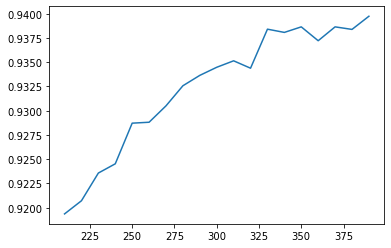

In [16]:
plt.plot(range(390,200,-10),score)
plt.show()

## 查看所有特征的卡方值和 p 值

In [17]:
chivalue, pvalues_chi = chi2(x_var, y)

In [18]:
print(chivalue[:10])
print(pvalues_chi[:10])

[ 945664.84392643 1244766.05139164 1554872.30384525 1834161.78305343
 1903618.94085294 1845226.62427198 1602117.23307537  708535.17489837
  974050.20513718 1188092.19961931]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# 消除所有 p 值大于设定值 0.05 的特征
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
print(k)

392


In [20]:
x_fschi = SelectKBest(chi2, k=392).fit_transform(x_var, y)

In [21]:
cross_val_score(RFC(n_estimators=100, random_state=0), x_fschi, y, cv=5).mean()

0.9637142857142857

## (2) F检验过滤

In [23]:
F, pvalues_f = f_classif(x_var, y)
print(F[:10])
print(pvalues_f[:10])
k = F.shape[0] - (pvalues_f > 0.05).sum()
print(k)

[ 618.65383492  846.18897012 1115.40617051 1362.3677305  1452.03355369
 1381.09095571 1138.26505266  464.29616121  660.00977785  849.66393412]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
392


In [26]:
x_fsf = SelectKBest(chi2, k=k).fit_transform(x_var, y)
cross_val_score(RFC(n_estimators=100, random_state=0), x_fsf, y, cv=5).mean()

0.9637142857142857

# 互信息法

In [22]:
f_fsmic = MIC(x_var, y)

In [23]:
k = f_fsmic.shape[0] - sum(f_fsmic <= 0)
print(k)

392


# Embedded 嵌入法

In [24]:
# 嵌入法使用的模型，这里用的是随机森林
RFC_ = RFC(n_estimators=10, random_state=0)

In [25]:
X_embedded = SelectFromModel(RFC_, threshold=0.005).fit_transform(x_var, y)

In [26]:
print(X_embedded.shape)

(42000, 55)


# 学习曲线找最佳阈值

In [27]:
threshold = np.linspace(0, (RFC_.fit(x_var, y).feature_importances_).max(), 20)

In [28]:
score = []

for i in threshold:
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(x_var, y)
    print(X_embedded.shape)
    once = cross_val_score(RFC_, X_embedded, y, cv=5).mean() # 用选出的特征跑交叉验证
    score.append(once)
    print("{} {}".format(i, once))

(42000, 392)
0.0 0.9390476190476191
(42000, 299)
0.0007098814595580704 0.9382857142857144
(42000, 223)
0.0014197629191161408 0.9359523809523809
(42000, 173)
0.0021296443786742113 0.9311428571428572
(42000, 125)
0.0028395258382322816 0.9261666666666667
(42000, 94)
0.003549407297790352 0.9206666666666665
(42000, 76)
0.004259288757348423 0.9132142857142858
(42000, 55)
0.004969170216906493 0.8954761904761904
(42000, 45)
0.005679051676464563 0.8882857142857142
(42000, 33)
0.0063889331360226335 0.8621428571428572
(42000, 24)
0.007098814595580704 0.8428333333333333
(42000, 15)
0.007808696055138774 0.7869285714285714
(42000, 8)
0.008518577514696845 0.6457619047619048
(42000, 8)
0.009228458974254915 0.6457619047619048
(42000, 7)
0.009938340433812986 0.6111666666666667
(42000, 4)
0.010648221893371055 0.4064047619047619
(42000, 4)
0.011358103352929126 0.4064047619047619
(42000, 4)
0.012067984812487198 0.4064047619047619
(42000, 2)
0.012777866272045267 0.30004761904761906
(42000, 1)
0.013487747731

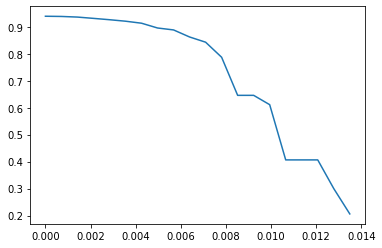

In [29]:
plt.plot(threshold, score)
plt.show()

In [30]:
X_embedded = SelectFromModel(RFC_,threshold=0.0007098814595580704).fit_transform(x_var, y)
print(X_embedded.shape)
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

(42000, 299)


0.9382857142857144

# 包装法 Wrapper

In [31]:
RFC_ = RFC(n_estimators=10, random_state=0)

In [32]:
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(x_var, y)

In [33]:
selector.support_.sum() # 保留的特征数

340

In [34]:
selector.ranking_[:20]

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3])

In [35]:
x_wrapper = selector.transform(x_var)
print(x_wrapper.shape)

(42000, 340)


In [36]:
cross_val_score(RFC_, x_wrapper, y, cv=5).mean()

0.9380000000000001

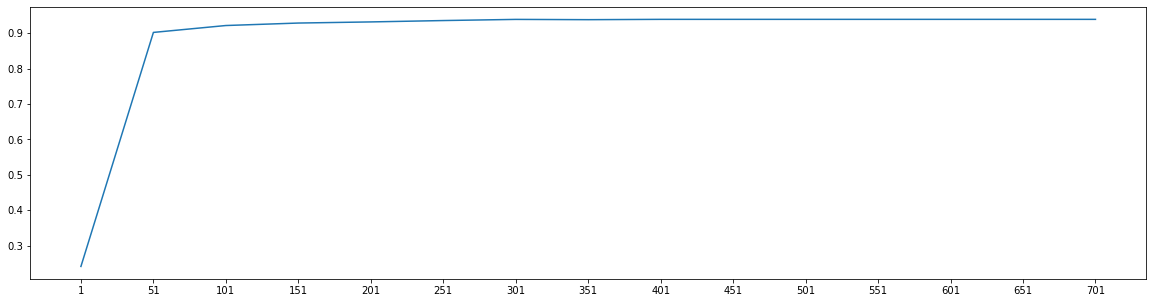

In [37]:
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x_var,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()